# **Các thành viên trong nhóm:**
1. Phạm Hoàng Trung Kiên - 52100904
2. Nguyễn Vĩnh Thi - 51800933
3. Lê Nguyễn Nhật Anh - 52100597

# **Đề bài:**
Đưa ra một bài toán dự đoán có thể giải quyết bằng học máy (machine leanring) với các yêu cầu sau:
-	Số Feature/Attribute gồm nhiều kiểu: categorial và numerical;
-	Dữ liệu phải chưa được học, thực tập trên lớp và trong bài tập về nhà;

1)	Phân tích thống kê trên dữ liệu, vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu. Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán.

2)	Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing.

3)	Sử dụng Feed Forward Neural Network và Reccurent Neural Network (hoặc mô thuộc loại này) để giải quyết bài toán .

4)	Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (2) và câu (3) để giải quyết bài toán.

5)	Sau khi huấn luyện xong mô hình thì muốn cải thiện độ chính xác, ta sẽ làm gì để giải quyết nó? Phân tích các trường hợp sai, đề ra giải pháp và thực hiện nó, sau đó đánh giá xem có cải tiến so với trước không.

# **Câu 1:**
Phân tích thống kê trên dữ liệu, vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu. Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán

**Nhóm em chọn**: Tập dữ liệu "Breast Cancer Wisconsin (Diagnostic)":

- Số lượng thuộc tính: 30
- Kiểu thuộc tính: Bao gồm cả thuộc tính hạng mục và thuộc tính số.
- Mô tả: Tập dữ liệu này chứa thông tin về các đặc điểm của các tế bào ung thư vú, bao gồm kích thước, hình dạng, độ đồng nhất, v.v. Mục tiêu là dự đoán xem một tế bào có lành tính hay ác tính dựa trên các thuộc tính đó.


In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Đọc tập dữ liệu từ URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = ['ID', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave Points', 'Symmetry', 'Fractal Dimension','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst',	'texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst',	'concavity_worst',	'concave points_worst',	'symmetry_worst',	'fractal_dimension_worst']
data = pd.read_csv(url, header=None, names=column_names)

In [3]:
# Xem một số dữ liệu mẫu
data.head()

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Số  hàng, số cột
data.shape

(569, 32)

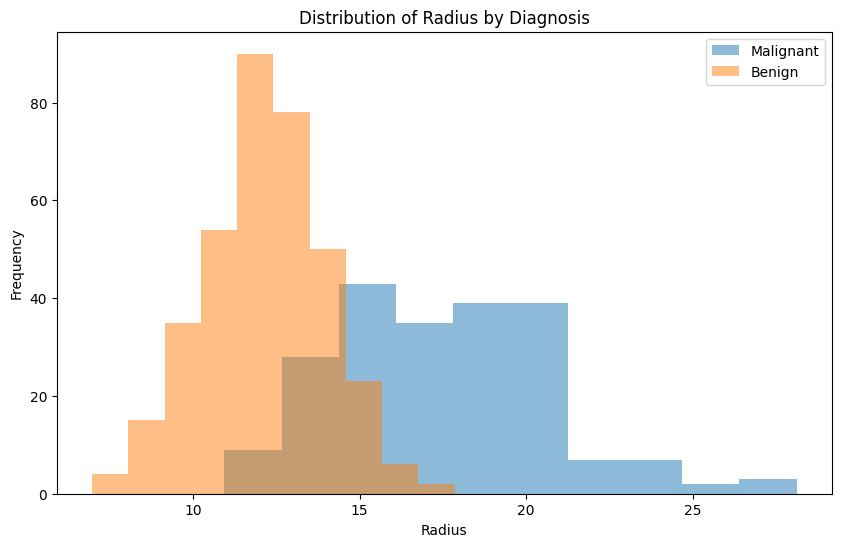

In [5]:
# Vẽ biểu đồ phân phối của thuộc tính Radius cho từng nhãn
plt.figure(figsize=(10, 6))
data[data['Diagnosis'] == 'M']['Radius'].plot(kind='hist', alpha=0.5, label='Malignant')
data[data['Diagnosis'] == 'B']['Radius'].plot(kind='hist', alpha=0.5, label='Benign')
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.title('Distribution of Radius by Diagnosis')
plt.legend()
plt.show()

<ipython-input-6-2141e66e0385>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.drop(['ID'], axis=1).corr()


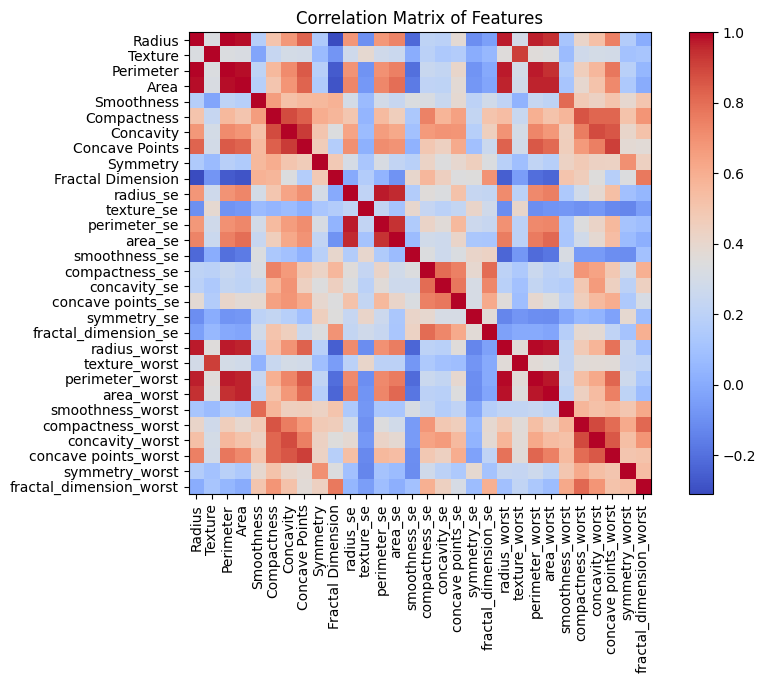

In [6]:
# Vẽ biểu đồ tương quan giữa các thuộc tính
plt.figure(figsize=(10, 6))
corr_matrix = data.drop(['ID'], axis=1).corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix of Features')
plt.show()

In [7]:
# Xem thông tin tổng quan về dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Radius                   569 non-null    float64
 3   Texture                  569 non-null    float64
 4   Perimeter                569 non-null    float64
 5   Area                     569 non-null    float64
 6   Smoothness               569 non-null    float64
 7   Compactness              569 non-null    float64
 8   Concavity                569 non-null    float64
 9   Concave Points           569 non-null    float64
 10  Symmetry                 569 non-null    float64
 11  Fractal Dimension        569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# Kiểm tra trùng lặp
data.duplicated().sum()

0

In [9]:
# Kiểm tra giá trị còn thiếu
data.isna().sum()

ID                         0
Diagnosis                  0
Radius                     0
Texture                    0
Perimeter                  0
Area                       0
Smoothness                 0
Compactness                0
Concavity                  0
Concave Points             0
Symmetry                   0
Fractal Dimension          0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
# Đổi cột Diagnosis(chuẩn đoán) thành mục tiêu và ác tính thành 1 và lành tính thành 0.
data = data.rename(columns={'Diagnosis' : 'target'})
data.target.replace({'M' : '1','B': '0'},inplace=True)


In [11]:
# Chuyển đổi loại của mục tiêu thành float64
data.target = data.target.astype('float64')

In [12]:
# Xem mô tả thống kê của các thuộc tính số
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
target,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
Radius,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
Texture,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
Perimeter,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
Area,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
Smoothness,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
Compactness,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
Concavity,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
Concave Points,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


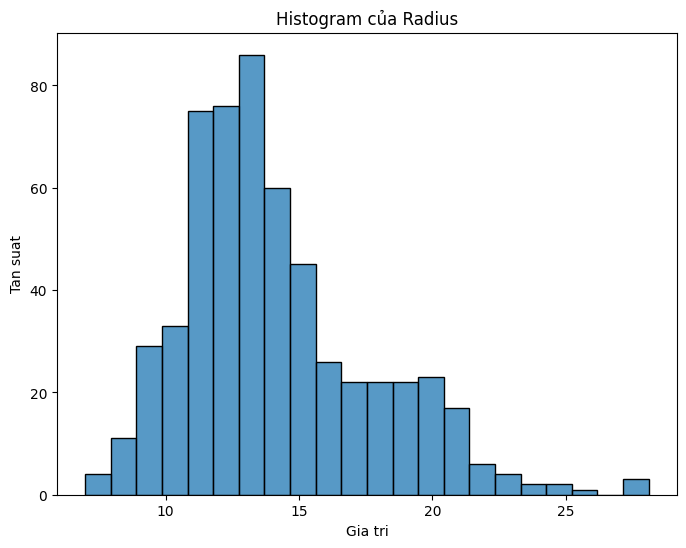

In [13]:
# Vẽ histogram cho một thuộc tính Radius
plt.figure(figsize=(8, 6))
sns.histplot(data['Radius'])
plt.title('Histogram của Radius')
plt.xlabel('Gia tri')
plt.ylabel('Tan suat')
plt.show()

In [14]:
# Xem phân bố của biến mục tiêu (Diagnosis)
data['target'].value_counts()

0.0    357
1.0    212
Name: target, dtype: int64

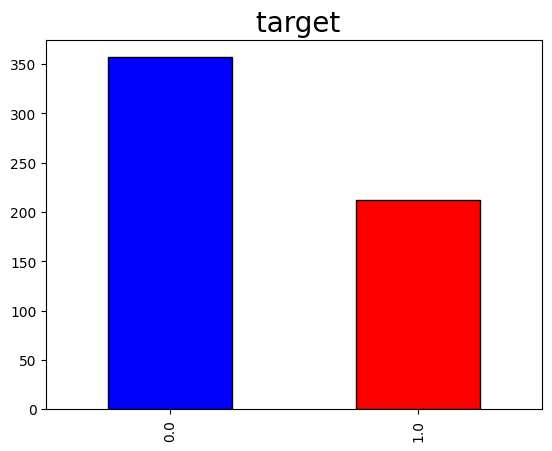

In [15]:
# Dữ liệu 'Diagnosis' được trực quan hóa
data['target'].value_counts().plot(kind='bar',edgecolor='black',color=['blue','red'])
plt.title(" target",fontsize=20)
plt.show()

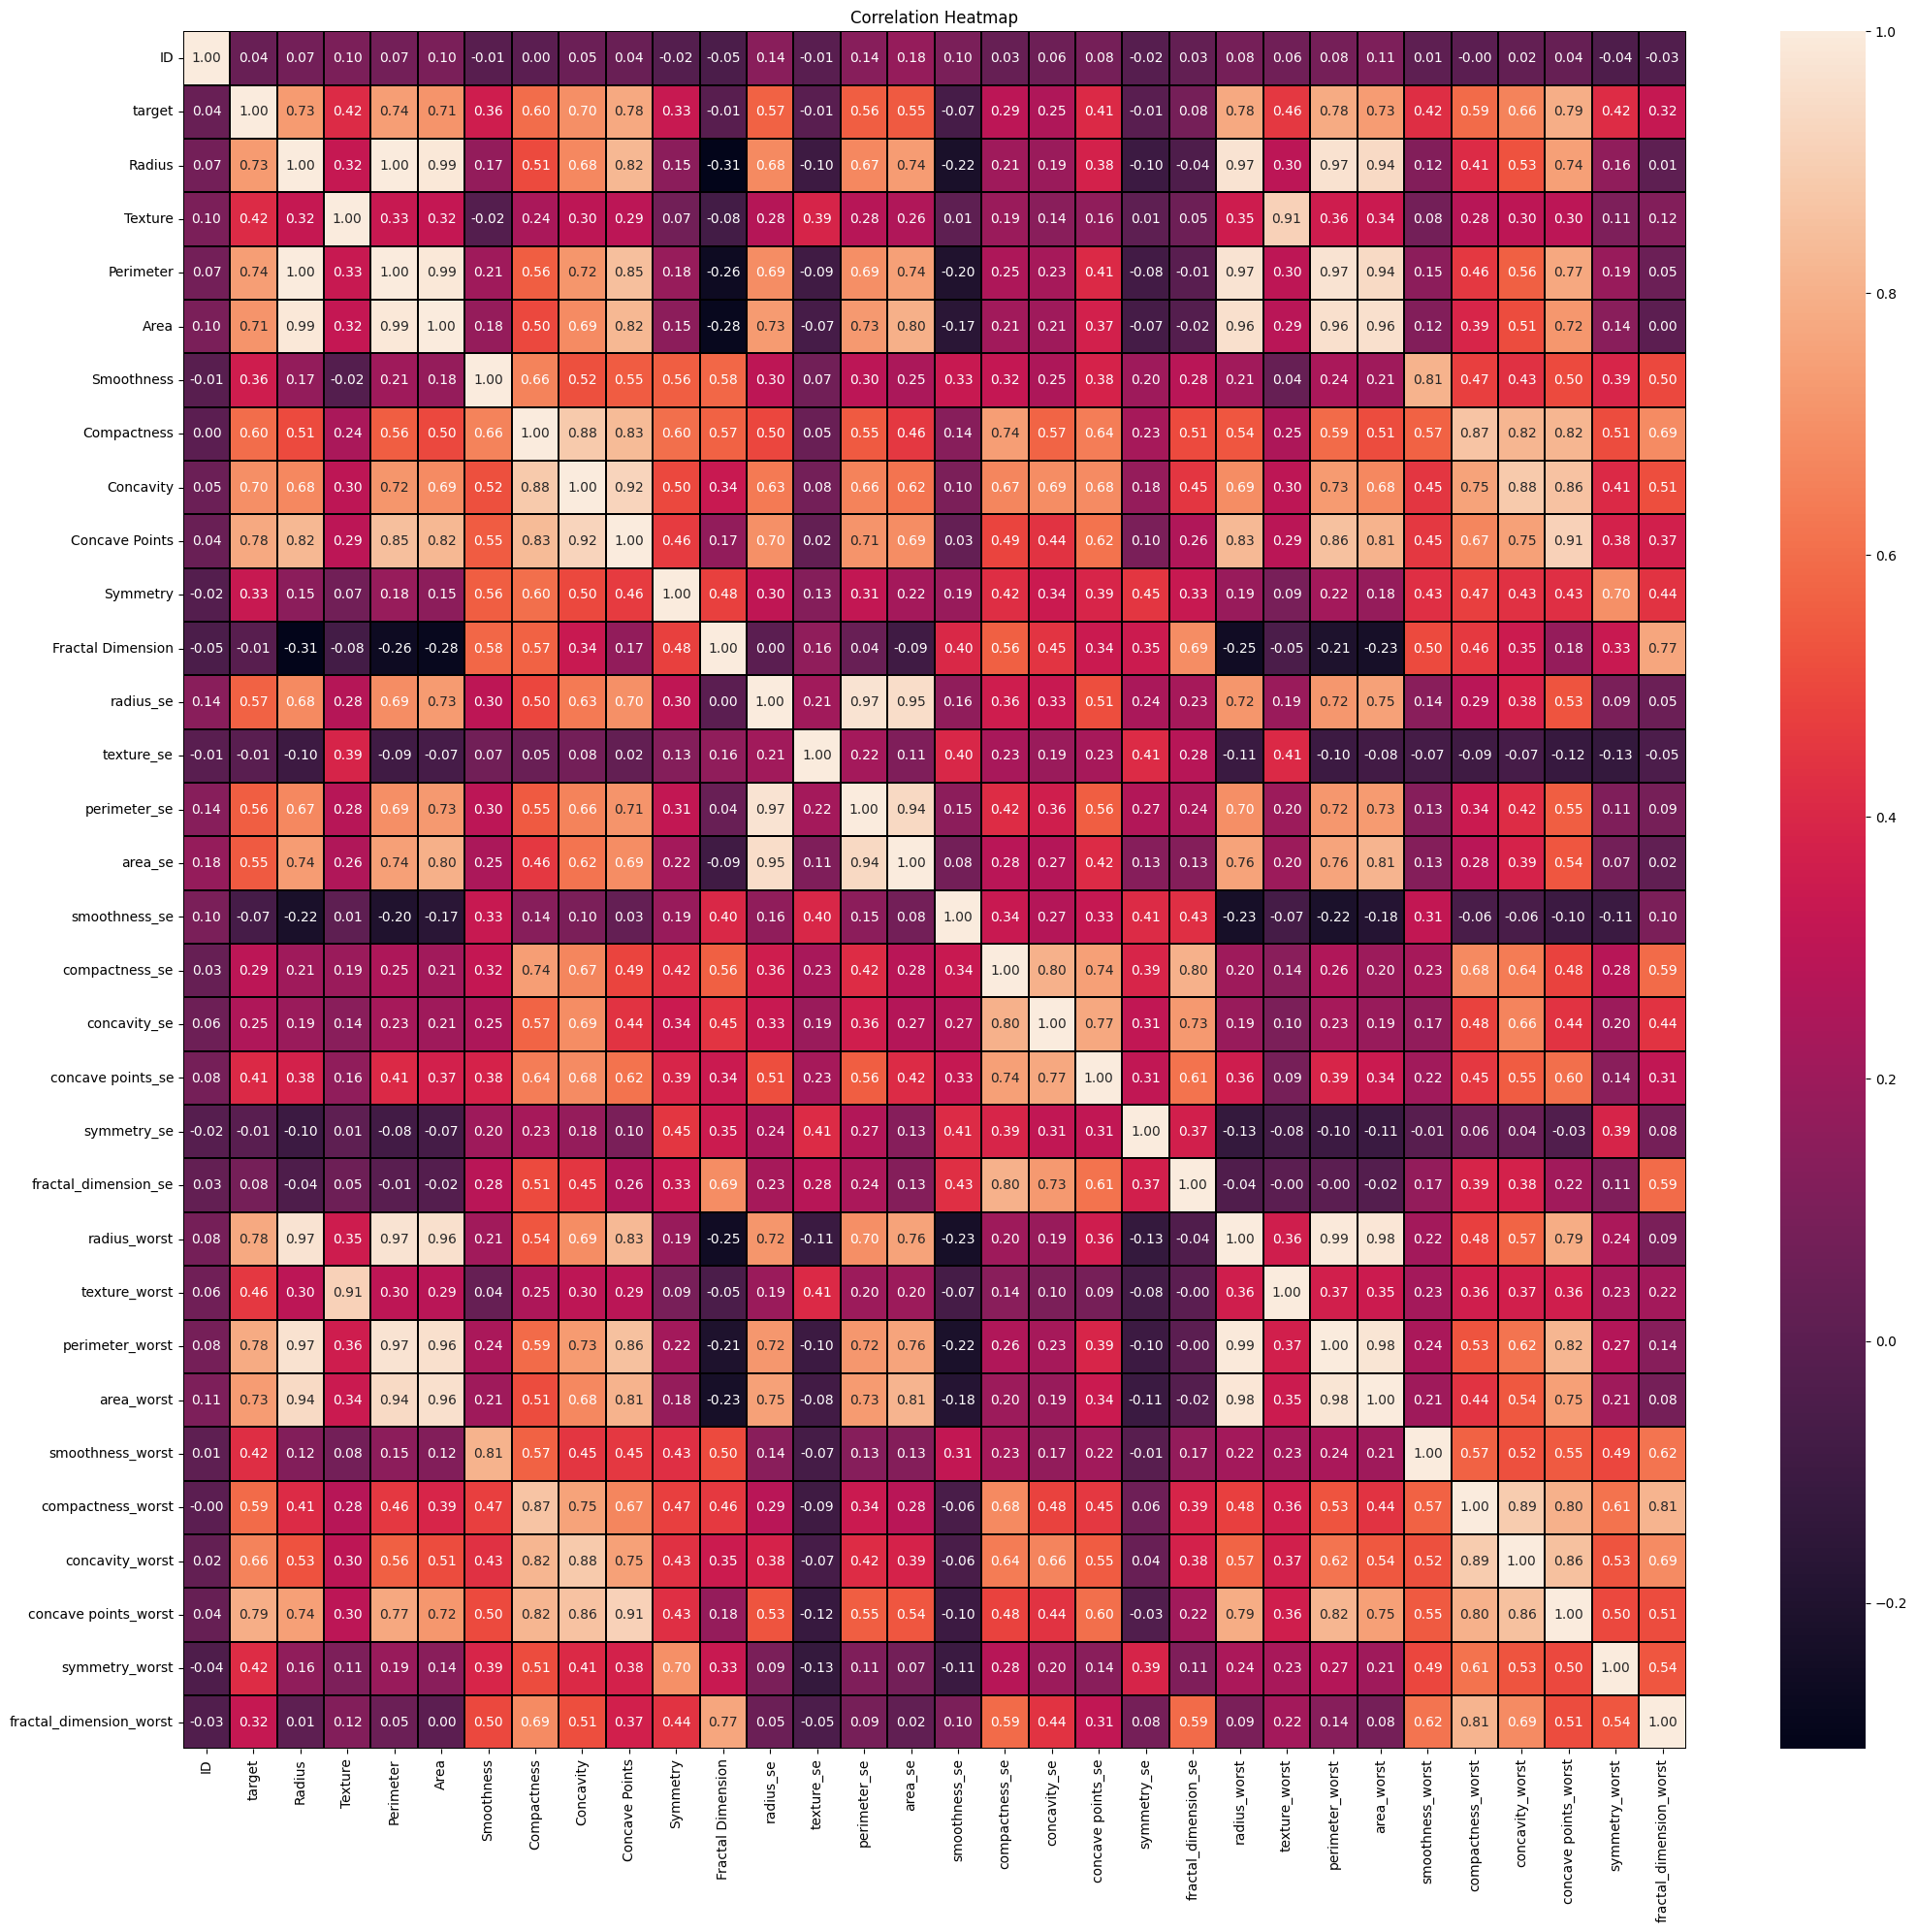

In [16]:
# Tính toán ma trận tương quan giữa các thuộc tính số
cor = data.corr()
plt.figure(figsize=(25,23))
sns.heatmap(cor, annot= True, linewidths= 0.3 ,linecolor = "black", fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x800 with 0 Axes>

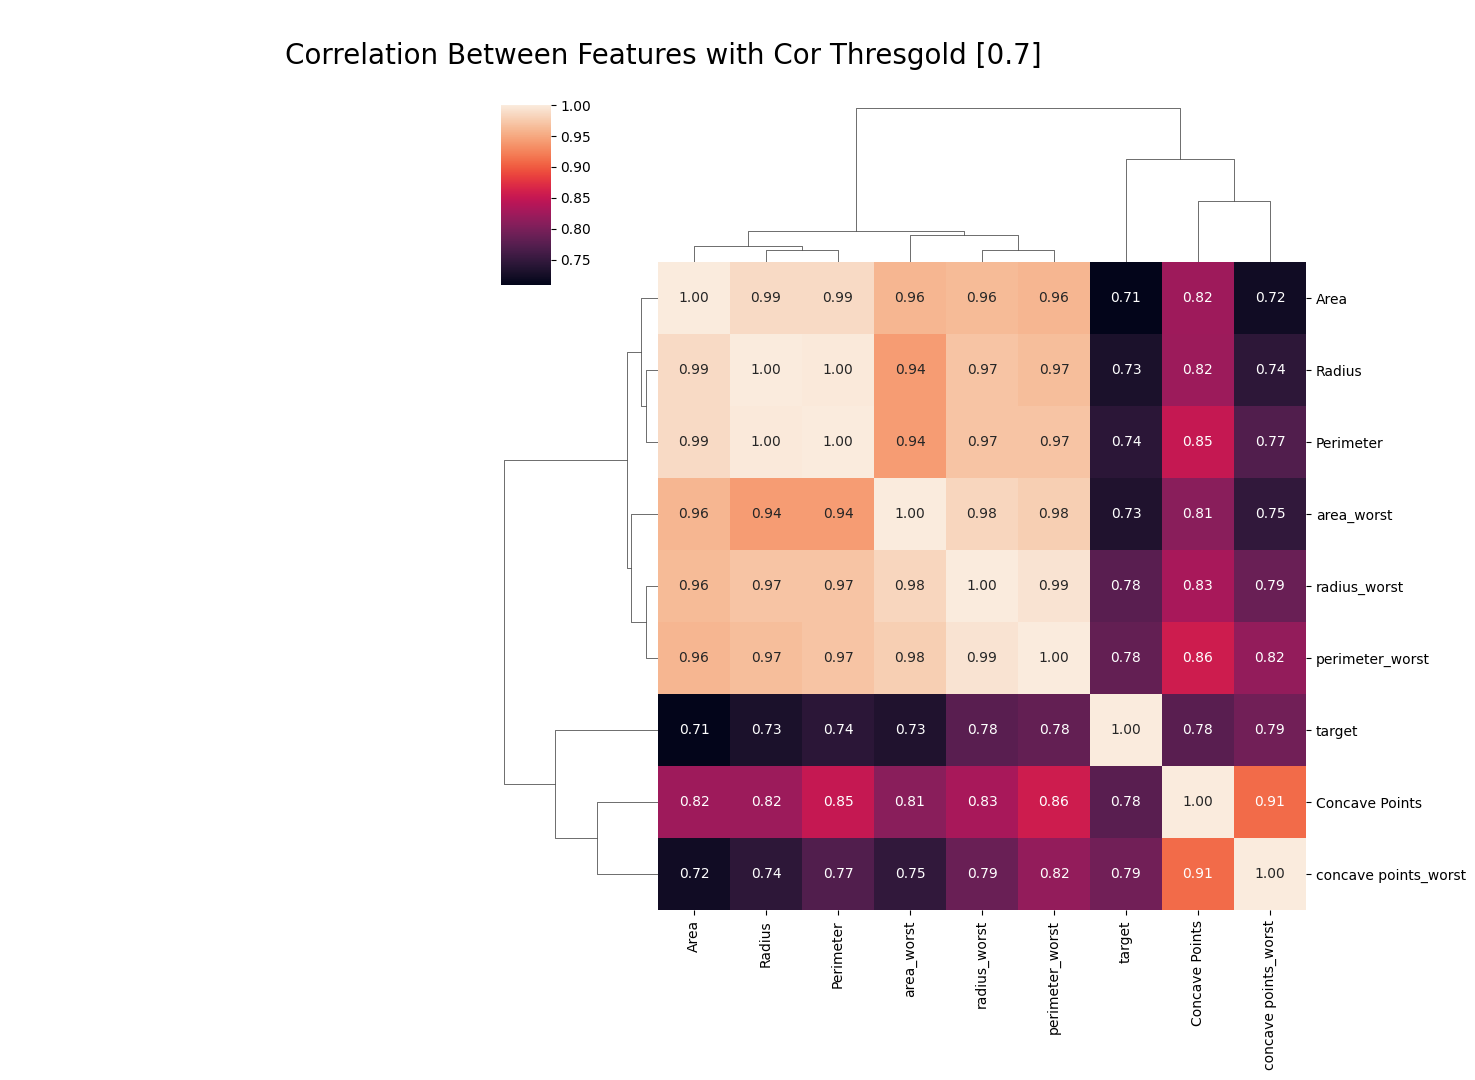

In [17]:
# Dữ liệu có hệ số tương quan lớn hơn 0,7
threshold = 0.7
filtre = np.abs(cor["target"] > threshold)
corr_features = cor.columns[filtre].tolist()
plt.figure(figsize=(10,8))
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("\n                               Correlation Between Features with Cor Thresgold [0.7]\n",fontsize=20)
plt.show()

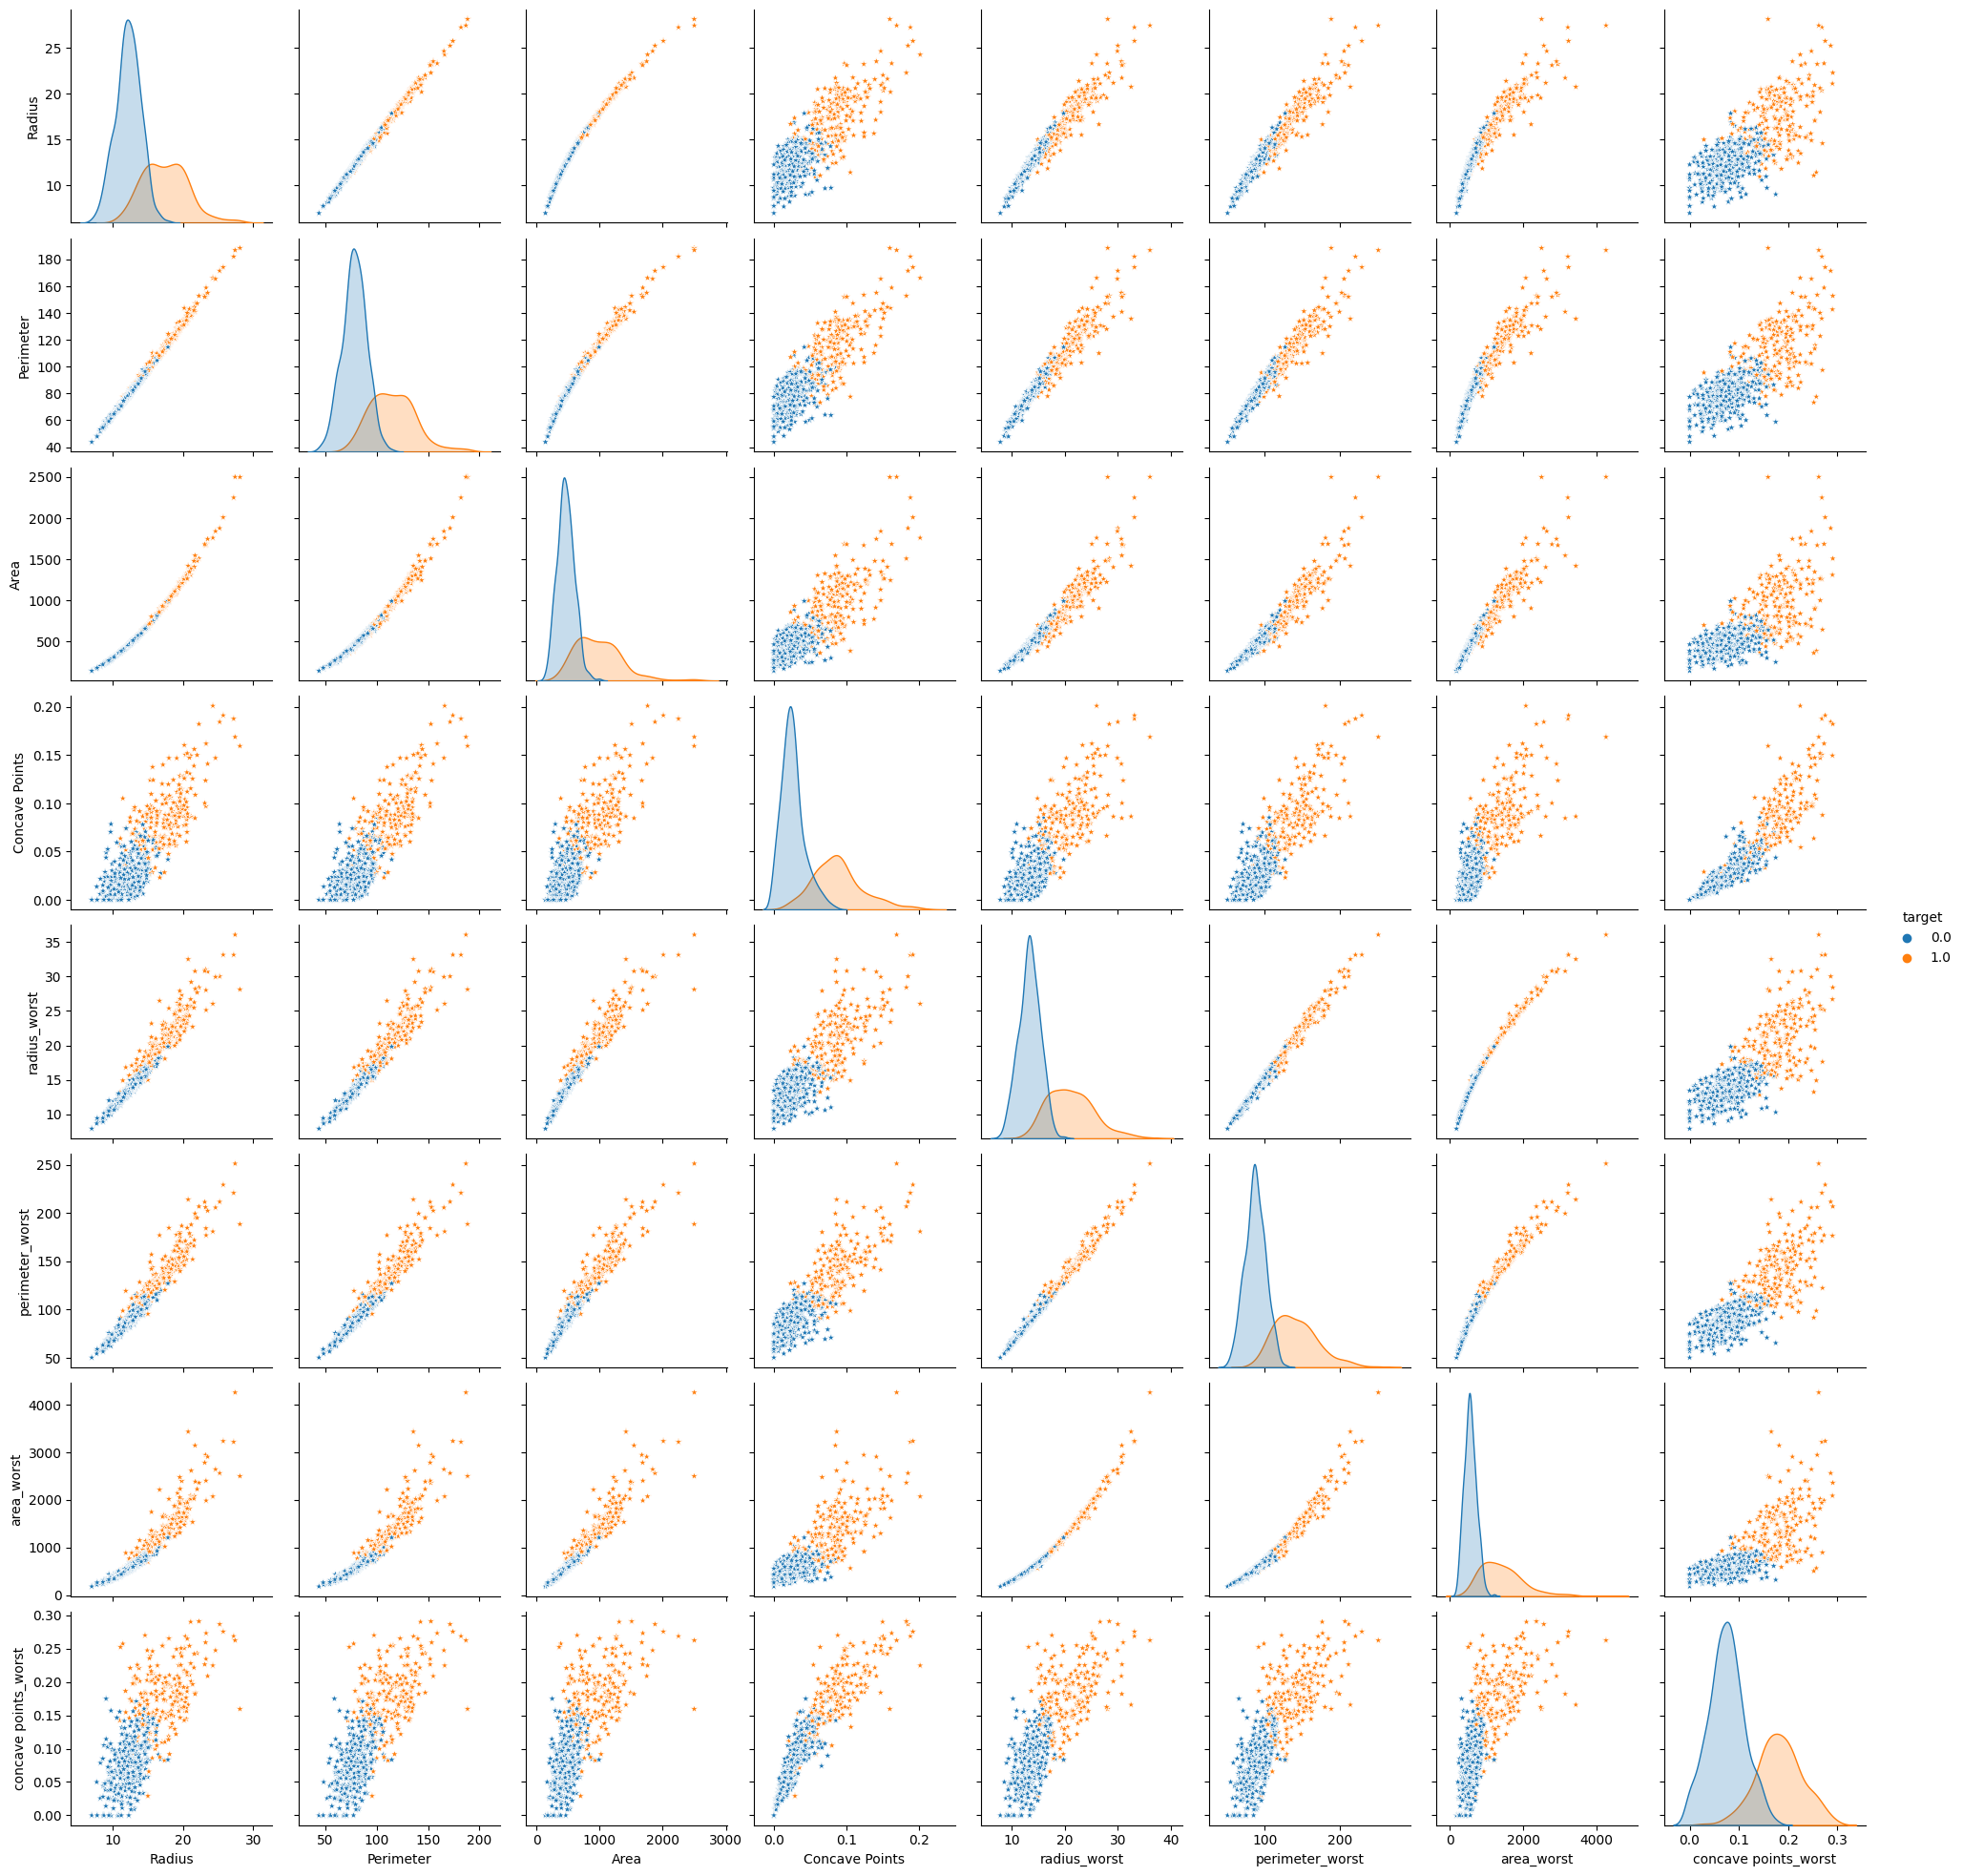

In [ ]:
# Trực quan hóa dữ liệu với mối tương quan lớn hơn 0,7
sns.pairplot(data[corr_features], diag_kind = "kde" , markers = "*", hue="target")
plt.show()

# **Câu 2:**
Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing.

In [18]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [19]:
# Đọc tập dữ liệu từ URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = ['ID', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave Points', 'Symmetry', 'Fractal Dimension','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst',	'texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst',	'concavity_worst',	'concave points_worst',	'symmetry_worst',	'fractal_dimension_worst']
data = pd.read_csv(url, header=None, names=column_names)

In [20]:
# Xem một số dữ liệu mẫu
data.head()

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
# Chia dữ liệu thành features và target
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']

In [22]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Xây dựng mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Đánh giá độ chính xác
accuracy_rf = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình Random Forest:", accuracy_rf)

Độ chính xác của mô hình Random Forest: 0.9649122807017544


In [24]:
# Xây dựng mô hình Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
gb_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
y_pred_gb = gb_model.predict(X_test)

# Đánh giá độ chính xác
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Độ chính xác của mô hình Gradient Boosting:", accuracy_gb)

Độ chính xác của mô hình Gradient Boosting: 0.956140350877193


In [25]:
# Xây dựng mô hình AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
adaboost_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
y_pred_adaboost = adaboost_model.predict(X_test)

# Đánh giá độ chính xác
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Độ chính xác của mô hình AdaBoost:", accuracy_adaboost)

Độ chính xác của mô hình AdaBoost: 0.9736842105263158


In [26]:
# Xây dựng mô hình BAGGING
# Khởi tạo mô hình Decision Tree Classifier
base_model = DecisionTreeClassifier()

# Khởi tạo Bagging Classifier với 100 mô hình con (estimators)
bagging_model = BaggingClassifier(base_model, n_estimators=100)

# Huấn luyện mô hình
bagging_model.fit(X_train, y_train)

# Dự đoán nhãn của tập kiểm tra
y_pred = bagging_model.predict(X_test)

# Đánh giá độ chính xác
accuracy_bagging = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình BAGGING : {:.2f}".format(accuracy_bagging))

Độ chính xác của mô hình BAGGING : 0.96


In [27]:
# Mô hình KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Độ chính xác của mô hình KNeighborsClassifier:", accuracy_knn)


Độ chính xác của mô hình KNeighborsClassifier: 0.956140350877193


In [28]:
# Mô hình DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Độ chính xác của mô hình DecisionTreeClassifier:", accuracy_dt)

Độ chính xác của mô hình DecisionTreeClassifier: 0.9473684210526315


In [29]:
# Mô hình GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Độ chính xác của mô hình GaussianNB:", accuracy_nb)

Độ chính xác của mô hình GaussianNB: 0.9736842105263158


In [30]:
# Mô hình LogisticRegression
lr_model = LogisticRegression(max_iter=5000, solver='saga')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Độ chính xác của mô hình LogisticRegression:", accuracy_lr)

Độ chính xác của mô hình LogisticRegression: 0.9736842105263158


Text(0.5, 1.0, 'Accuracy of Ensemble Learning Models')

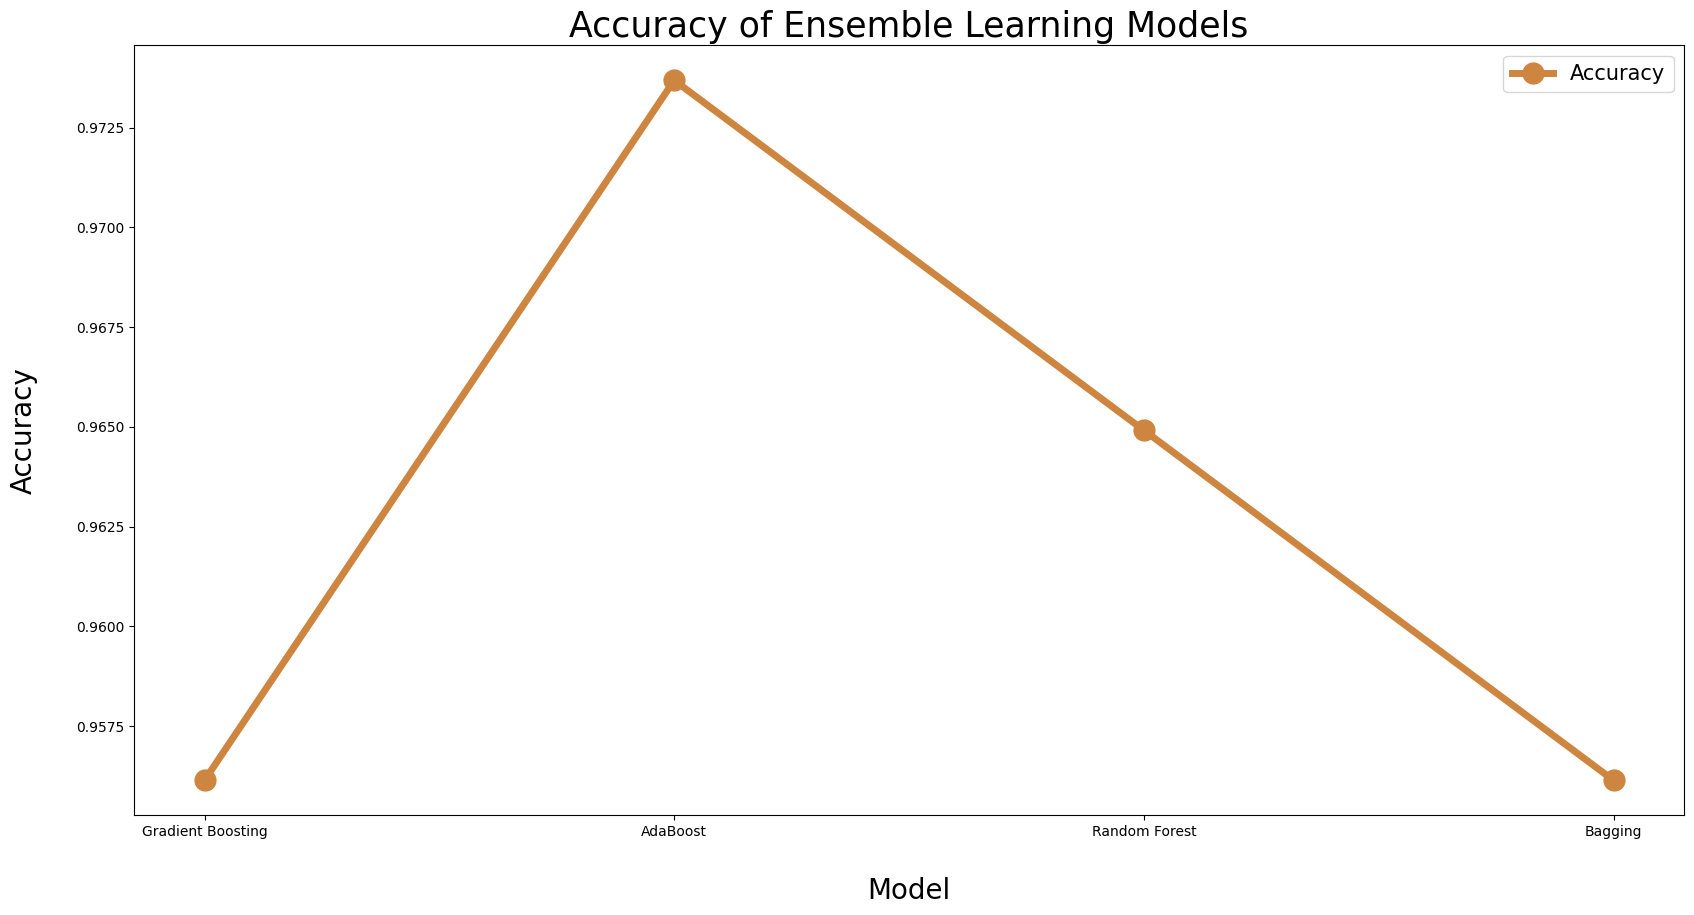

In [31]:
import matplotlib.pyplot as plt
# Danh sách tên mô hình
model_names = ['Gradient Boosting', 'AdaBoost', 'Random Forest','Bagging']

# Danh sách độ chính xác của mô hình
accuracies = [accuracy_gb, accuracy_adaboost, accuracy_rf, accuracy_bagging]

# Vẽ biểu đồ đường
fig = plt.figure(figsize=(20, 10))
plt.plot(model_names, accuracies, label='Accuracy', lw=5, color='peru', marker='o', markersize=15)
plt.legend(fontsize=15)
plt.xlabel('\nModel', fontsize=20)
plt.ylabel('Accuracy\n', fontsize=20)
plt.title('Accuracy of Ensemble Learning Models', fontsize=25)

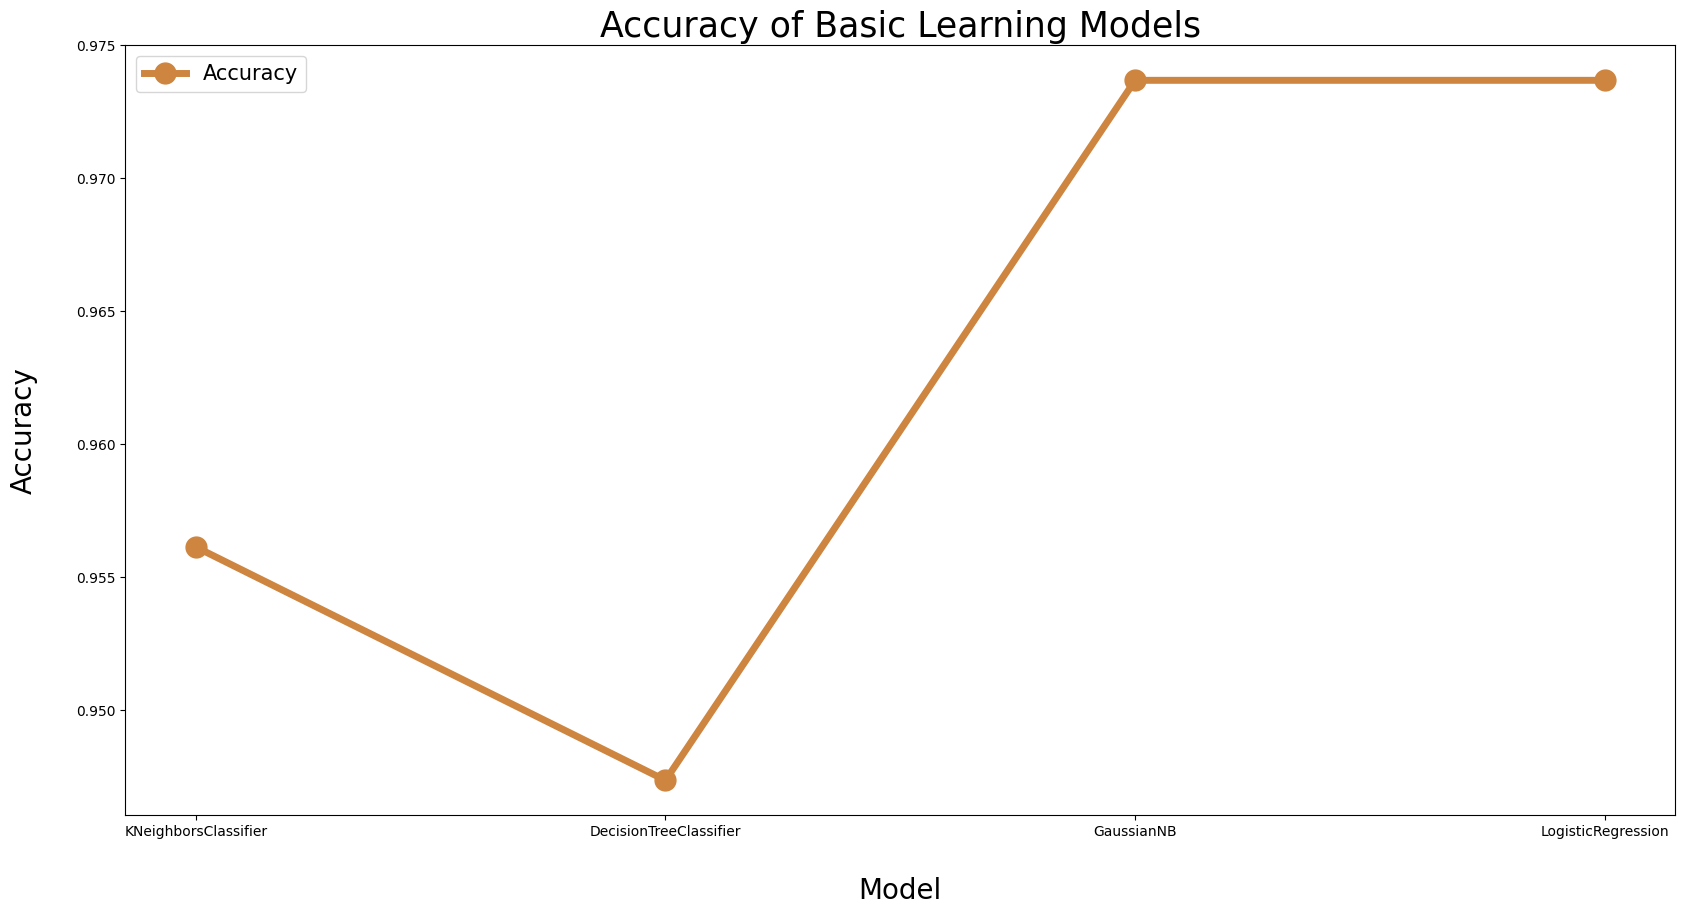

In [32]:
# Danh sách tên mô hình
model_names = ['KNeighborsClassifier', 'DecisionTreeClassifier','GaussianNB', 'LogisticRegression']

# Danh sách độ chính xác của mô hình
accuracies = [accuracy_knn, accuracy_dt, accuracy_nb, accuracy_lr]

# Vẽ biểu đồ đường
fig = plt.figure(figsize=(20, 10))
plt.plot(model_names, accuracies, label='Accuracy', lw=5, color='peru', marker='o', markersize=15)
plt.legend(fontsize=15)
plt.xlabel('\nModel', fontsize=20)
plt.ylabel('Accuracy\n', fontsize=20)
plt.title('Accuracy of Basic Learning Models', fontsize=25)
plt.show()

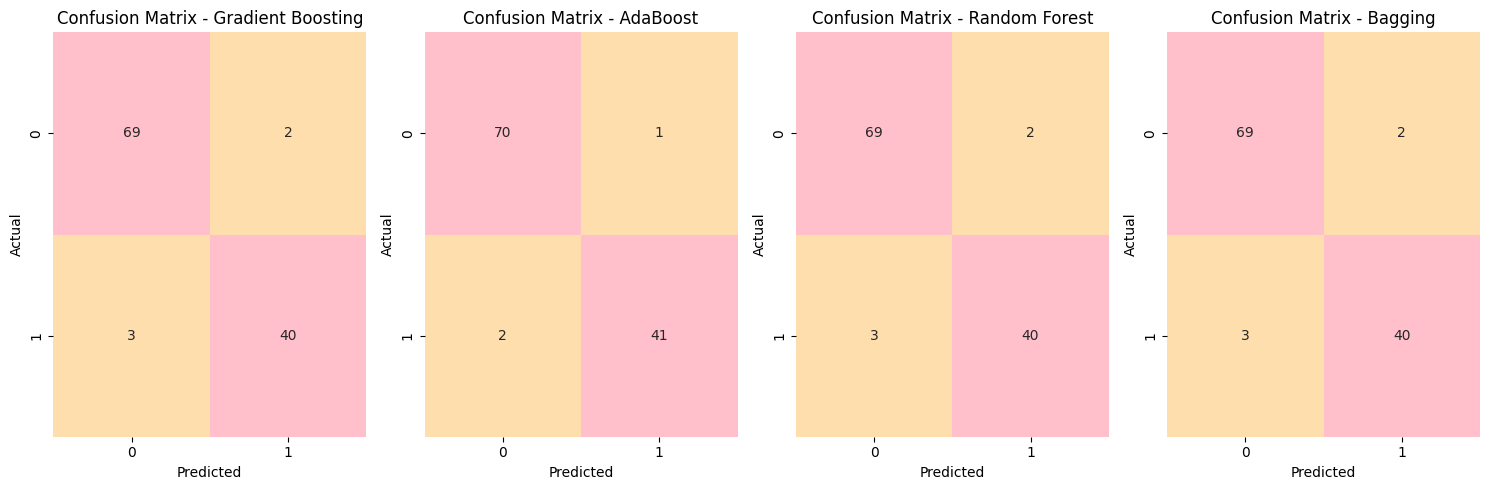

In [33]:
# Confusion Matrix cho mô hình Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Confusion Matrix cho mô hình AdaBoost
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# Confusion Matrix cho mô hình Random Forest
cm_rf = confusion_matrix(y_test, y_pred)

# Confusion Matrix cho mô hình Bagging
cm_bg = confusion_matrix(y_test, y_pred)

# Vẽ Confusion Matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.heatmap(cm_gb, annot=True, cmap=['navajowhite','pink'], fmt='d', cbar=False)
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 2)
sns.heatmap(cm_adaboost, annot=True, cmap=['navajowhite','pink'], fmt='d', cbar=False)
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 3)
sns.heatmap(cm_rf, annot=True, cmap=['navajowhite','pink'], fmt='d', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 4)
sns.heatmap(cm_bg, annot=True, cmap=['navajowhite','pink'], fmt='d', cbar=False)
plt.title('Confusion Matrix - Bagging')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

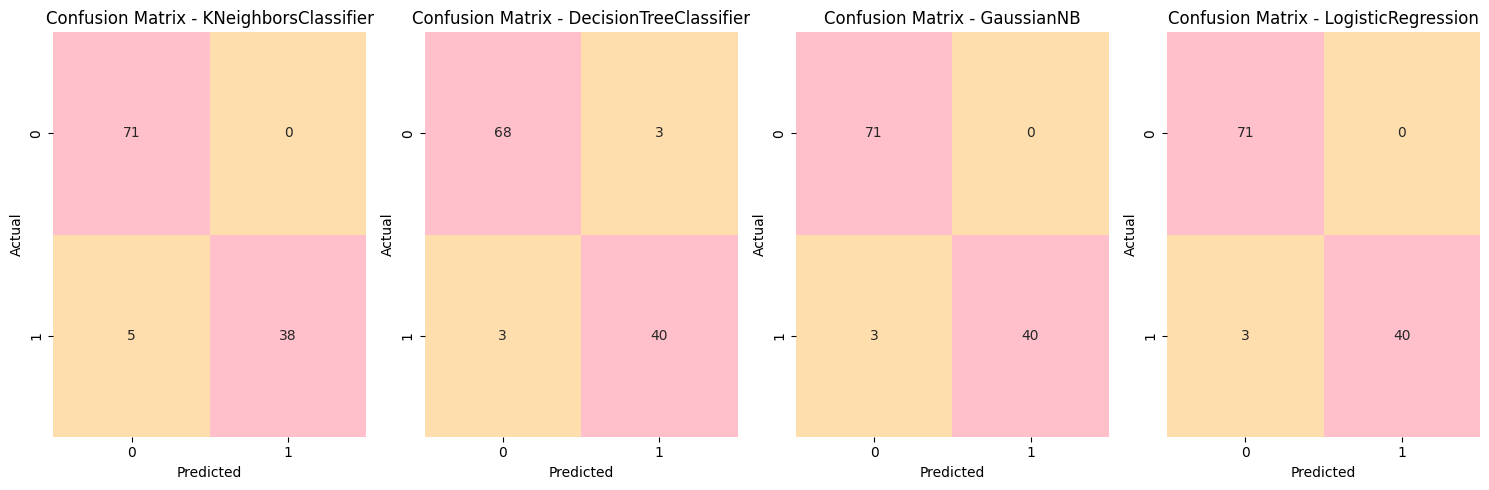

In [34]:
# Confusion Matrix cho mô hình KNeighborsClassifier
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Confusion Matrix cho mô hình DecisionTreeClassifier
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Confusion Matrix cho mô hình GaussianNB
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Confusion Matrix cho mô hình LogisticRegression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Vẽ Confusion Matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.heatmap(cm_knn, annot=True, cmap=['navajowhite','pink'], fmt='d', cbar=False)
plt.title('Confusion Matrix - KNeighborsClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 2)
sns.heatmap(cm_dt, annot=True, cmap=['navajowhite','pink'], fmt='d', cbar=False)
plt.title('Confusion Matrix - DecisionTreeClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 3)
sns.heatmap(cm_nb, annot=True, cmap=['navajowhite','pink'], fmt='d', cbar=False)
plt.title('Confusion Matrix - GaussianNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 4)
sns.heatmap(cm_lr, annot=True, cmap=['navajowhite','pink'], fmt='d', cbar=False)
plt.title('Confusion Matrix - LogisticRegression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

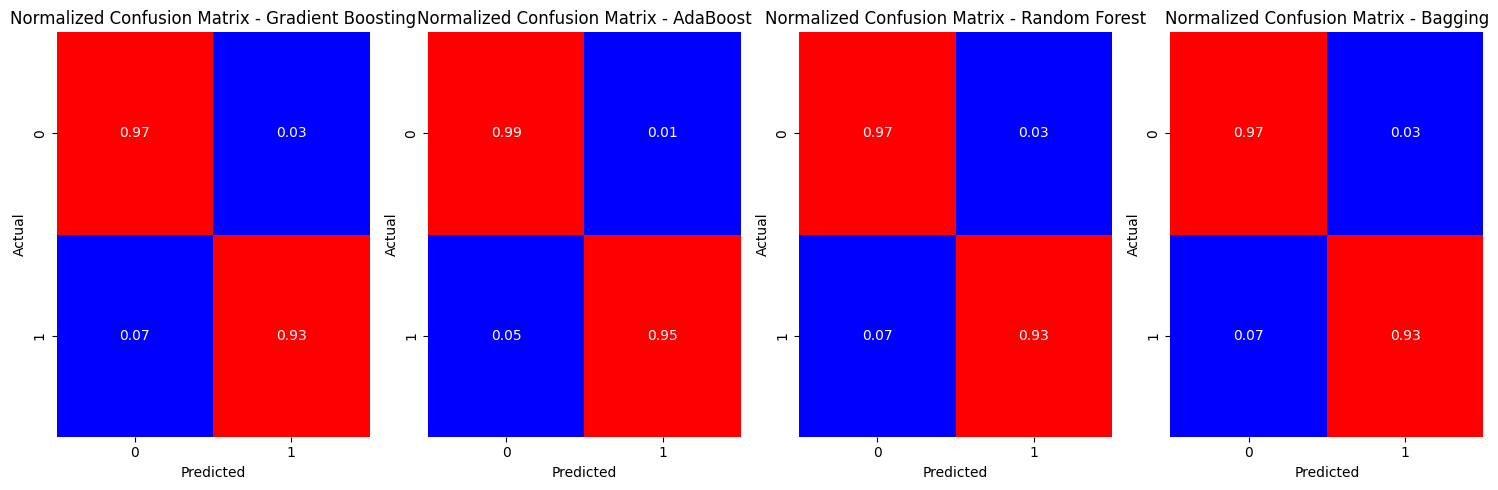

In [35]:
# Normalized Confusion Matrix cho mô hình Gradient Boosting
cm_gb_normalized = confusion_matrix(y_test, y_pred_gb, normalize='true')

# Normalized Confusion Matrix cho mô hình AdaBoost
cm_adaboost_normalized = confusion_matrix(y_test, y_pred_adaboost, normalize='true')

# Normalized Confusion Matrix cho mô hình Random Forest
cm_rf_normalized = confusion_matrix(y_test, y_pred, normalize='true')

# Normalized Confusion Matrix cho mô hình Bagging
cm_bg_normalized = confusion_matrix(y_test, y_pred, normalize='true')

# Vẽ Normalized Confusion Matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.heatmap(cm_gb_normalized, annot=True, cmap=['blue','red'], fmt='.2f', cbar=False)
plt.title('Normalized Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 2)
sns.heatmap(cm_adaboost_normalized, annot=True, cmap=['blue','red'], fmt='.2f', cbar=False)
plt.title('Normalized Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 3)
sns.heatmap(cm_rf_normalized, annot=True, cmap=['blue','red'], fmt='.2f', cbar=False)
plt.title('Normalized Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 4)
sns.heatmap(cm_bg_normalized, annot=True, cmap=['blue','red'], fmt='.2f', cbar=False)
plt.title('Normalized Confusion Matrix - Bagging')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

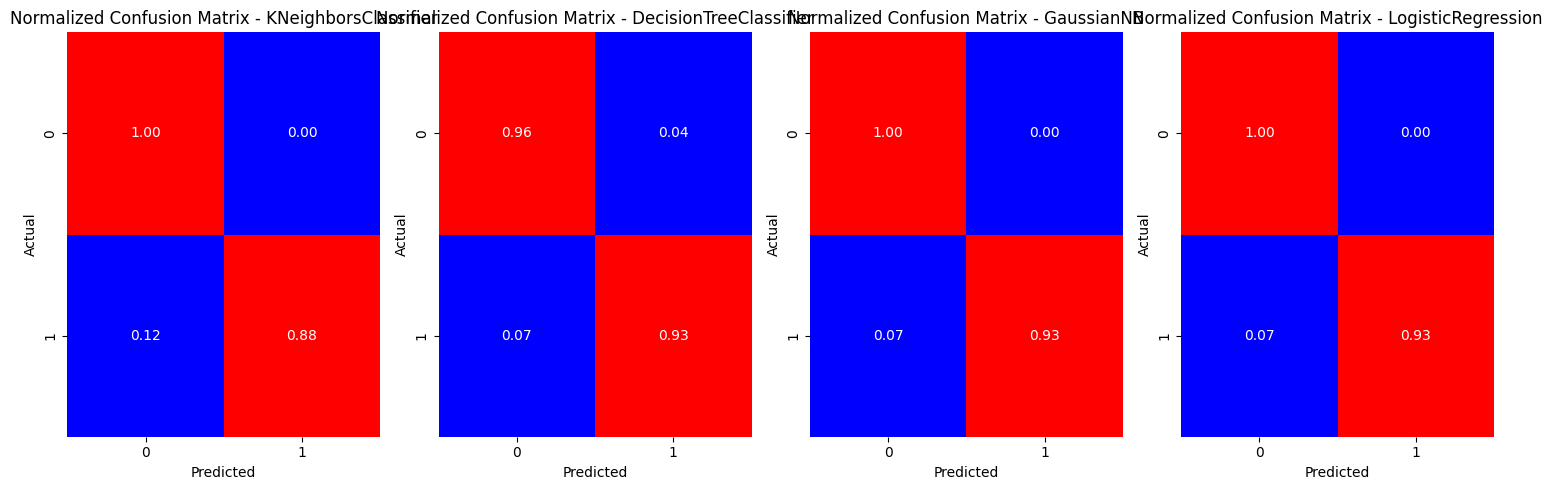

In [36]:
# Normalized Confusion Matrix cho mô hình KNeighborsClassifier
cm_knn_normalized = confusion_matrix(y_test, y_pred_knn, normalize='true')

# Normalized Confusion Matrix cho mô hình DecisionTreeClassifier
cm_dt_normalized = confusion_matrix(y_test, y_pred_dt, normalize='true')

# Normalized Confusion Matrix cho mô hình GaussianNB
cm_nb_normalized = confusion_matrix(y_test, y_pred_nb, normalize='true')

# Normalized Confusion Matrix cho mô hình LogisticRegression
cm_lr_normalized = confusion_matrix(y_test, y_pred_lr, normalize='true')

# Vẽ Normalized Confusion Matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.heatmap(cm_knn_normalized, annot=True, cmap=['blue','red'], fmt='.2f', cbar=False)
plt.title('Normalized Confusion Matrix - KNeighborsClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 2)
sns.heatmap(cm_dt_normalized, annot=True, cmap=['blue','red'], fmt='.2f', cbar=False)
plt.title('Normalized Confusion Matrix - DecisionTreeClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 3)
sns.heatmap(cm_nb_normalized, annot=True, cmap=['blue','red'], fmt='.2f', cbar=False)
plt.title('Normalized Confusion Matrix - GaussianNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 4)
sns.heatmap(cm_lr_normalized, annot=True, cmap=['blue','red'], fmt='.2f', cbar=False)
plt.title('Normalized Confusion Matrix - LogisticRegression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [37]:
# Classification Report cho mô hình Gradient Boosting
classification_report_gb = classification_report(y_test, y_pred_gb)
print("Classification Report - Gradient Boosting:")
print(classification_report_gb)

# Classification Report cho mô hình AdaBoost
classification_report_adaboost = classification_report(y_test, y_pred_adaboost)
print("Classification Report - AdaBoost:")
print(classification_report_adaboost)

# Classification Report cho mô hình Random Forest
classification_report_rf = classification_report(y_test, y_pred)
print("Classification Report - Random Forest:")
print(classification_report_rf)

Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification Report - AdaBoost:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Classification Report - Random Forest:
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg

In [38]:
# Classification Report cho mô hình KNeighborsClassifier
classification_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report - KNeighborsClassifier:")
print(classification_report_knn)

# Classification Report cho mô hình DecisionTreeClassifier
classification_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report - DecisionTreeClassifier:")
print(classification_report_dt)

# Classification Report cho mô hình GaussianNB
classification_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report - GaussianNB:")
print(classification_report_nb)

# Classification Report cho mô hình LogisticRegression
classification_report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report - LogisticRegression:")
print(classification_report_lr)

Classification Report - KNeighborsClassifier:
              precision    recall  f1-score   support

           B       0.93      1.00      0.97        71
           M       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification Report - DecisionTreeClassifier:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Classification Report - GaussianNB:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        71
           M       1.00      0.93      0.96        43

    accuracy                           0.97       11

# **Câu 3:**
Sử dụng Feed Forward Neural Network và Reccurent Neural Network (hoặc mô thuộc loại này) để giải quyết bài toán

In [39]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [40]:
# Đọc tập dữ liệu từ URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = ['ID', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave Points', 'Symmetry', 'Fractal Dimension','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst',	'texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst',	'concavity_worst',	'concave points_worst',	'symmetry_worst',	'fractal_dimension_worst']
data = pd.read_csv(url, header=None, names=column_names)

In [41]:
# Xem một số dữ liệu mẫu
data.head()

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
# Chia dữ liệu thành features và target
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']


In [43]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Tách features và labels
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Label encoding cho target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/10
15/15 [==============================] - 3s 51ms/step - loss: 22.6196 - accuracy: 0.3143 - val_loss: 16.2379 - val_accuracy: 0.3421
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 12.9917 - accuracy: 0.3165 - val_loss: 11.1898 - val_accuracy: 0.3509
Epoch 3/10
15/15 [==============================] - 0s 16ms/step - loss: 9.9175 - accuracy: 0.4264 - val_loss: 8.8219 - val_accuracy: 0.5088
Epoch 4/10
15/15 [==============================] - 0s 13ms/step - loss: 7.6288 - accuracy: 0.4989 - val_loss: 6.2962 - val_accuracy: 0.5439
Epoch 5/10
15/15 [==============================] - 0s 17ms/step - loss: 5.8734 - accuracy: 0.5692 - val_loss: 5.8881 - val_accuracy: 0.6491
Epoch 6/10
15/15 [==============================] - 0s 21ms/step - loss: 5.3711 - accuracy: 0.6242 - val_loss: 3.7323 - val_accuracy: 0.6491
Epoch 7/10
15/15 [==============================] - 0s 12ms/step - loss: 3.7341 - accuracy: 0.6659 - val_loss: 3.2503 - val_accuracy: 0.7544
Epoch 8/1

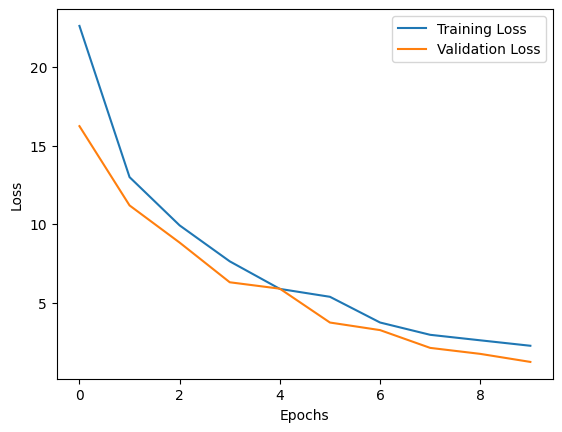

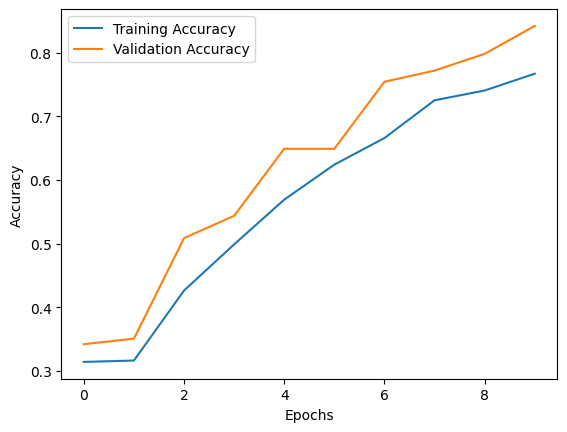

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# Feed Forward Neural Network
# Khởi tạo mô hình
model_ffnn = Sequential()

# Thêm các layer
model_ffnn.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model_ffnn.add(Dense(1, activation='sigmoid'))

# Compile mô hình
model_ffnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
history1 = model_ffnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Lấy các thông số loss và accuracy từ thông tin quá trình huấn luyện
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']
train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_ffnn.summary()

In [46]:
# Dự đoán nhãn nhị phân từ mô hình Feed Forward Neural Network
y_pred_ffnn = model_ffnn.predict(X_test)
y_pred_ffnn_binary = np.where(y_pred_ffnn >= 0.5, 1, 0)

# In báo cáo phân loại
print(classification_report(y_test, y_pred_ffnn_binary))

4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.85      0.87        71
           1       0.77      0.84      0.80        43

    accuracy                           0.84       114
   macro avg       0.83      0.84      0.83       114
weighted avg       0.85      0.84      0.84       114



Epoch 1/10
15/15 [==============================] - 6s 169ms/step - loss: 2.9452 - accuracy: 0.4286 - val_loss: 0.6779 - val_accuracy: 0.3860
Epoch 2/10
15/15 [==============================] - 0s 33ms/step - loss: 0.6338 - accuracy: 0.6176 - val_loss: 0.5581 - val_accuracy: 0.7719
Epoch 3/10
15/15 [==============================] - 0s 29ms/step - loss: 0.5474 - accuracy: 0.8549 - val_loss: 0.5060 - val_accuracy: 0.9298
Epoch 4/10
15/15 [==============================] - 0s 32ms/step - loss: 0.5441 - accuracy: 0.7604 - val_loss: 0.4752 - val_accuracy: 0.9035
Epoch 5/10
15/15 [==============================] - 0s 28ms/step - loss: 0.4901 - accuracy: 0.8637 - val_loss: 0.4362 - val_accuracy: 0.9298
Epoch 6/10
15/15 [==============================] - 0s 23ms/step - loss: 0.4601 - accuracy: 0.8703 - val_loss: 0.4318 - val_accuracy: 0.8421
Epoch 7/10
15/15 [==============================] - 0s 19ms/step - loss: 0.4517 - accuracy: 0.8571 - val_loss: 0.3804 - val_accuracy: 0.9298
Epoch 8/10
1

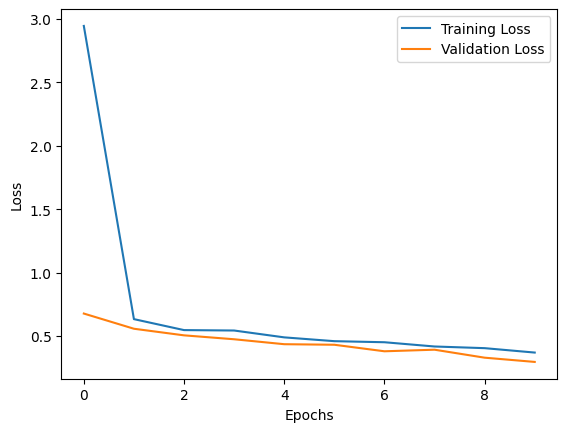

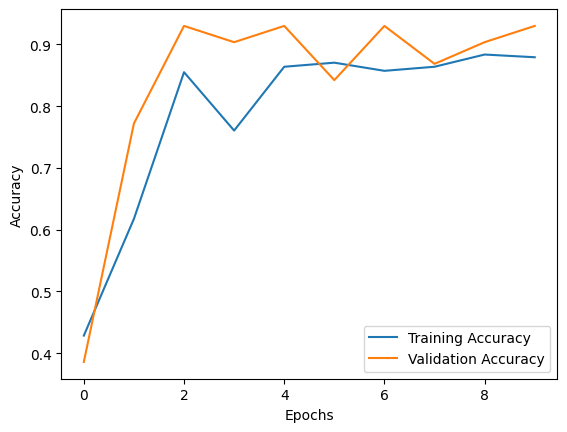

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# Recurrent Neural Network (RNN)
# Khởi tạo mô hình
model_rnn = Sequential()

# Thêm các layer
model_rnn.add(SimpleRNN(32, input_shape=(X_train.shape[1], 1), activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile mô hình
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape dữ liệu để phù hợp với input shape của RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Huấn luyện mô hình
history2 = model_rnn.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Lấy các thông số loss và accuracy từ thông tin quá trình huấn luyện
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_rnn.summary()

In [48]:
# Dự đoán nhãn nhị phân từ mô hình Recurrent Neural Network (RNN)
y_pred_rnn = model_rnn.predict(X_test_rnn)
y_pred_rnn_binary = np.where(y_pred_rnn >= 0.5, 1, 0)

# In báo cáo phân loại
print(classification_report(y_test, y_pred_rnn_binary))

4/4 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        71
           1       1.00      0.81      0.90        43

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114



# **Câu 4:**
Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (2) và câu (3) để giải quyết bài toán


In [68]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [50]:
# Đọc tập dữ liệu từ URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = ['ID', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave Points', 'Symmetry', 'Fractal Dimension','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst',	'texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst',	'concavity_worst',	'concave points_worst',	'symmetry_worst',	'fractal_dimension_worst']
data = pd.read_csv(url, header=None, names=column_names)

In [51]:
# Xem một số dữ liệu mẫu
data.head()

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
# Chia dữ liệu thành features và target
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']

In [53]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Mô hình Random Forest
from sklearn.model_selection import cross_val_score

# Xây dựng mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Kiểm định chéo với 5 fold
scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# In ra độ chính xác trung bình
print("Độ chính xác trung bình (cross-validation):", scores.mean())

Độ chính xác trung bình (cross-validation): 0.956043956043956


In [55]:
# Mô hình GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Khởi tạo mô hình GaussianNB
nb_model = GaussianNB(priors=None)

# Áp dụng cross-validation
scores = cross_val_score(nb_model, X_train, y_train, cv=5)

# In độ chính xác trung bình của cross-validation
print("Độ chính xác trung bình của mô hình GaussianNB sau cross-validation:", scores.mean())

# Huấn luyện mô hình trên toàn bộ tập huấn luyện
nb_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
y_pred_nb = nb_model.predict(X_test)

# Tính độ chính xác
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Độ chính xác của mô hình GaussianNB trên tập kiểm tra:", accuracy_nb)

Độ chính xác trung bình của mô hình GaussianNB sau cross-validation: 0.9340659340659341
Độ chính xác của mô hình GaussianNB trên tập kiểm tra: 0.9736842105263158


In [56]:
# Mô hình LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình LogisticRegression
lr_model = LogisticRegression(max_iter=5000, solver='saga', penalty='l2')

# Áp dụng cross-validation
scores = cross_val_score(lr_model, X_train, y_train, cv=5)

# In độ chính xác trung bình của cross-validation
print("Độ chính xác trung bình của mô hình LogisticRegression sau cross-validation:", scores.mean())

# Huấn luyện mô hình trên toàn bộ tập huấn luyện
lr_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
y_pred_lr = lr_model.predict(X_test)

# Tính độ chính xác
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Độ chính xác của mô hình LogisticRegression trên tập kiểm tra:", accuracy_lr)

Độ chính xác trung bình của mô hình LogisticRegression sau cross-validation: 0.9120879120879121
Độ chính xác của mô hình LogisticRegression trên tập kiểm tra: 0.9736842105263158


In [57]:
# Tách features và labels
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Label encoding cho target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/10
15/15 [==============================] - 2s 31ms/step - loss: 11.7608 - accuracy: 0.2835 - val_loss: 5.9331 - val_accuracy: 0.2719
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 4.8960 - accuracy: 0.4242 - val_loss: 3.3816 - val_accuracy: 0.5000
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 2.8893 - accuracy: 0.5626 - val_loss: 1.9498 - val_accuracy: 0.7368
Epoch 4/10
15/15 [==============================] - 0s 9ms/step - loss: 2.3165 - accuracy: 0.6505 - val_loss: 1.5581 - val_accuracy: 0.7018
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 1.9922 - accuracy: 0.7143 - val_loss: 1.5881 - val_accuracy: 0.6754
Epoch 6/10
15/15 [==============================] - 0s 9ms/step - loss: 1.8689 - accuracy: 0.7429 - val_loss: 1.2435 - val_accuracy: 0.7368
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 1.5539 - accuracy: 0.7429 - val_loss: 0.9450 - val_accuracy: 0.8158
Epoch 8/10
15/15 [

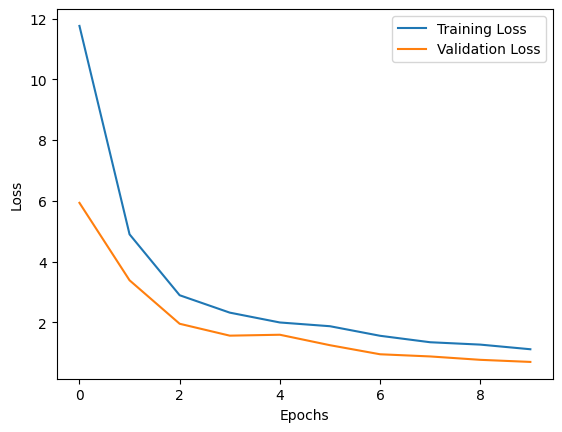

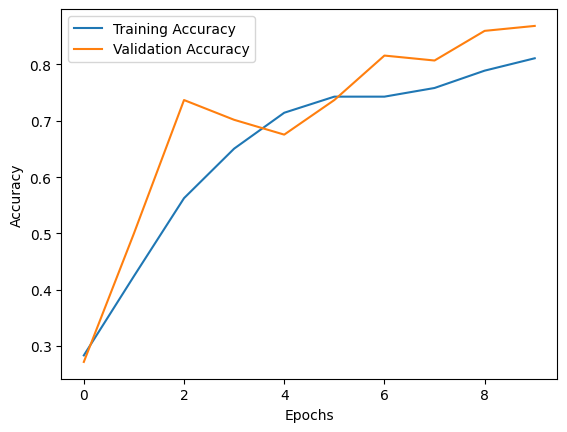

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                992       
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# Áp dụng các kỹ thuật tránh Overfitting trên các mô hình Feed Forward Neural Network Cách 1

# Feed Forward Neural Network
# Khởi tạo mô hình
from keras import regularizers

model_ffnn = Sequential()

# Thêm các layer với regularizers
model_ffnn.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_ffnn.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

# Compile mô hình
model_ffnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
history1 = model_ffnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Lấy các thông số loss và accuracy từ thông tin quá trình huấn luyện
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']
train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_ffnn.summary()

Epoch 1/10
15/15 [==============================] - 1s 35ms/step - loss: 53.6114 - accuracy: 0.5495 - val_loss: 0.8018 - val_accuracy: 0.8684
Epoch 2/10
15/15 [==============================] - 0s 15ms/step - loss: 44.7597 - accuracy: 0.5231 - val_loss: 3.7327 - val_accuracy: 0.6053
Epoch 3/10
15/15 [==============================] - 0s 11ms/step - loss: 35.5221 - accuracy: 0.5560 - val_loss: 0.6019 - val_accuracy: 0.9211
Epoch 4/10
15/15 [==============================] - 0s 12ms/step - loss: 36.9779 - accuracy: 0.5934 - val_loss: 0.6045 - val_accuracy: 0.9211
Epoch 5/10
15/15 [==============================] - 0s 20ms/step - loss: 26.6185 - accuracy: 0.5692 - val_loss: 0.6868 - val_accuracy: 0.9123
Epoch 6/10
15/15 [==============================] - 0s 17ms/step - loss: 26.5036 - accuracy: 0.6044 - val_loss: 0.7169 - val_accuracy: 0.9298
Epoch 7/10
15/15 [==============================] - 0s 20ms/step - loss: 22.2712 - accuracy: 0.6440 - val_loss: 0.5575 - val_accuracy: 0.9211
Epoch 

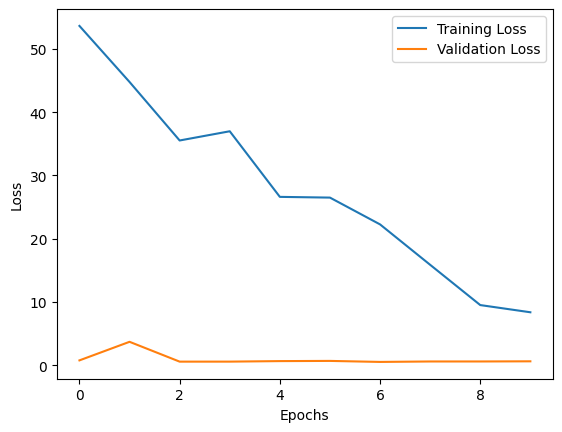

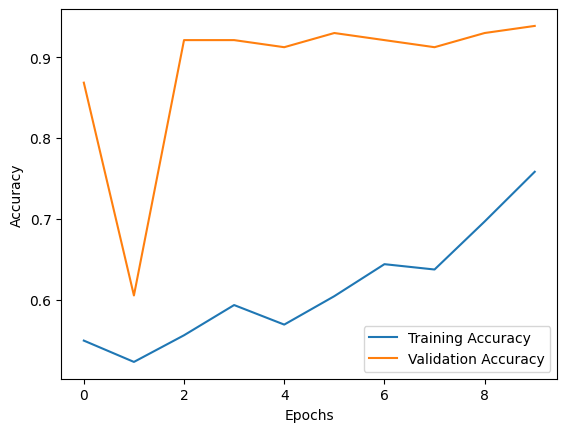

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                992       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
# Áp dụng các kỹ thuật tránh Overfitting trên các mô hình Feed Forward Neural Network Cách 2

# Feed Forward Neural Network
# Khởi tạo mô hình
from keras.layers import Dropout

model_ffnn = Sequential()

# Thêm các layer
# Thêm Dropout layer
model_ffnn.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model_ffnn.add(Dropout(0.5))
model_ffnn.add(Dense(1, activation='sigmoid'))

# Compile mô hình
model_ffnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
history1 = model_ffnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Lấy các thông số loss và accuracy từ thông tin quá trình huấn luyện
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']
train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_ffnn.summary()

Epoch 1/10
15/15 [==============================] - 1s 23ms/step - loss: 4.0350 - accuracy: 0.0000e+00 - val_loss: 4.0290 - val_accuracy: 0.0000e+00
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 4.0350 - accuracy: 0.0000e+00 - val_loss: 4.0290 - val_accuracy: 0.0000e+00
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 4.0350 - accuracy: 0.0000e+00 - val_loss: 4.0290 - val_accuracy: 0.0000e+00
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 4.0350 - accuracy: 0.0000e+00 - val_loss: 4.0290 - val_accuracy: 0.0000e+00
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 4.0350 - accuracy: 0.0000e+00 - val_loss: 4.0290 - val_accuracy: 0.0000e+00
Epoch 6/10
15/15 [==============================] - 0s 8ms/step - loss: 4.0350 - accuracy: 0.0000e+00 - val_loss: 4.0290 - val_accuracy: 0.0000e+00


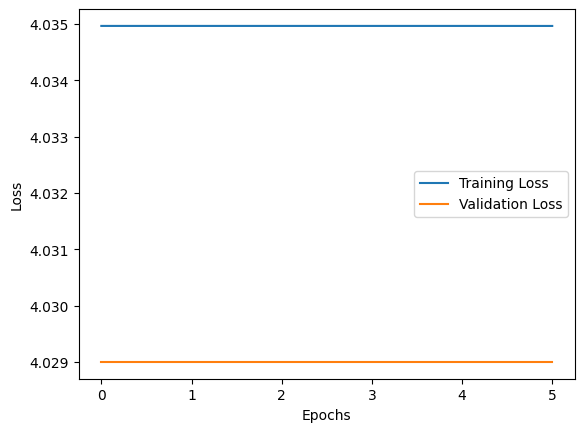

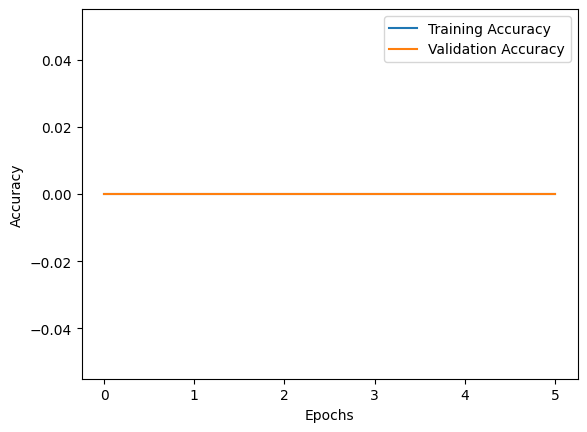

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# Áp dụng các kỹ thuật tránh Overfitting trên các mô hình Feed Forward Neural Network Cách 3

# Feed Forward Neural Network
# Khởi tạo mô hình
# Tạo EarlyStopping callback
from keras.callbacks import EarlyStopping

model_ffnn = Sequential()

early_stopping = EarlyStopping(monitor='val_loss', patience=5)


# # Thêm các layer
# # Thêm Dropout layer
# model_ffnn.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
# model_ffnn.add(Dropout(0.5))
# model_ffnn.add(Dense(1, activation='sigmoid'))

# Compile mô hình
model_ffnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình với early stopping
history1 = model_ffnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# # Huấn luyện mô hình
# history1 = model_ffnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Lấy các thông số loss và accuracy từ thông tin quá trình huấn luyện
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']
train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_ffnn.summary()

Epoch 1/10
15/15 [==============================] - 5s 75ms/step - loss: 12.7031 - accuracy: 0.5846 - val_loss: 4.8677 - val_accuracy: 0.3772
Epoch 2/10
15/15 [==============================] - 0s 25ms/step - loss: 4.6677 - accuracy: 0.4791 - val_loss: 0.6520 - val_accuracy: 0.3860
Epoch 3/10
15/15 [==============================] - 0s 14ms/step - loss: 2.0013 - accuracy: 0.5297 - val_loss: 0.5476 - val_accuracy: 0.6754
Epoch 4/10
15/15 [==============================] - 0s 16ms/step - loss: 1.2032 - accuracy: 0.5143 - val_loss: 0.5087 - val_accuracy: 0.9123
Epoch 5/10
15/15 [==============================] - 0s 17ms/step - loss: 0.9264 - accuracy: 0.5736 - val_loss: 0.5143 - val_accuracy: 0.8509
Epoch 6/10
15/15 [==============================] - 0s 19ms/step - loss: 0.6951 - accuracy: 0.6154 - val_loss: 0.4871 - val_accuracy: 0.9298
Epoch 7/10
15/15 [==============================] - 0s 24ms/step - loss: 0.6278 - accuracy: 0.6659 - val_loss: 0.5316 - val_accuracy: 0.8421
Epoch 8/10
1

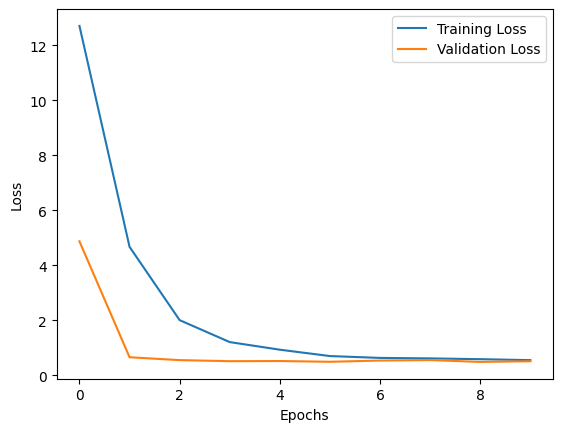

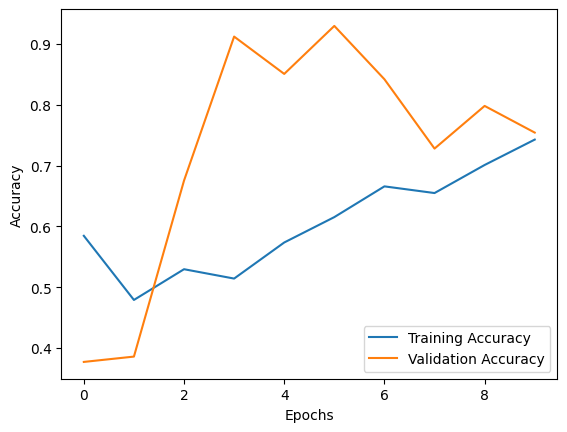

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# Áp dụng các kỹ thuật tránh Overfitting trên các mô hình Recurrent Neural Network Cách 1

# Recurrent Neural Network (RNN)
# Khởi tạo mô hình
model_rnn = Sequential()

# Thêm lớp RNN
model_rnn.add(SimpleRNN(32, input_shape=(X_train.shape[1], 1), activation='relu'))

# Thêm Dropout layer
model_rnn.add(Dropout(0.5))

# Thêm lớp Dense
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile mô hình
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape dữ liệu để phù hợp với input shape của RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Huấn luyện mô hình
history2 = model_rnn.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Lấy các thông số loss và accuracy từ thông tin quá trình huấn luyện
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_rnn.summary()

Epoch 1/10
15/15 [==============================] - 4s 93ms/step - loss: 29.3317 - accuracy: 0.4637 - val_loss: 0.9003 - val_accuracy: 0.3772
Epoch 2/10
15/15 [==============================] - 0s 24ms/step - loss: 16.1186 - accuracy: 0.4901 - val_loss: 0.6481 - val_accuracy: 0.3947
Epoch 3/10
15/15 [==============================] - 0s 24ms/step - loss: 13.4418 - accuracy: 0.4637 - val_loss: 0.6979 - val_accuracy: 0.6228
Epoch 4/10
15/15 [==============================] - 0s 29ms/step - loss: 9.1633 - accuracy: 0.4791 - val_loss: 0.8052 - val_accuracy: 0.6228
Epoch 5/10
15/15 [==============================] - 0s 25ms/step - loss: 7.1676 - accuracy: 0.4549 - val_loss: 0.8571 - val_accuracy: 0.6228
Epoch 6/10
15/15 [==============================] - 0s 26ms/step - loss: 6.7569 - accuracy: 0.4703 - val_loss: 0.8171 - val_accuracy: 0.6228
Epoch 7/10
15/15 [==============================] - 0s 22ms/step - loss: 5.4038 - accuracy: 0.4615 - val_loss: 0.7446 - val_accuracy: 0.6228
Epoch 8/10

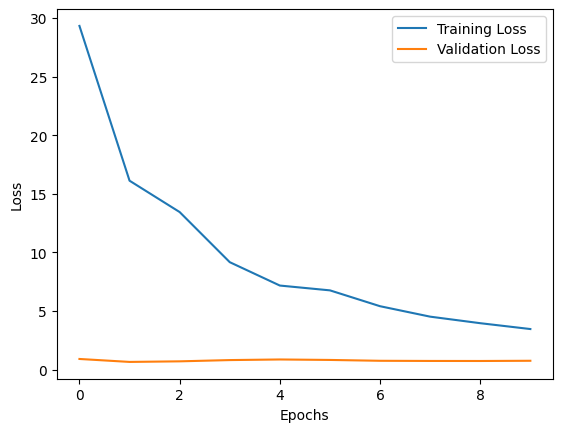

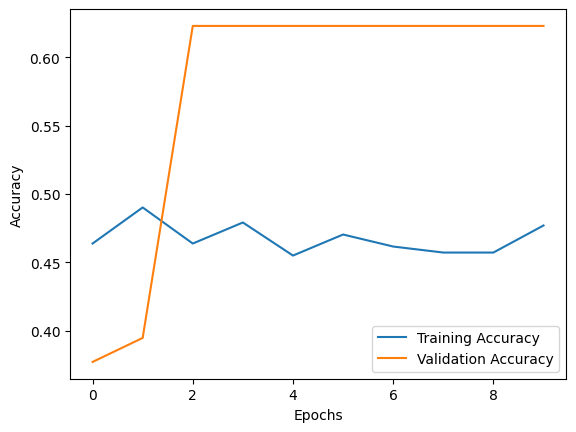

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
# Áp dụng các kỹ thuật tránh Overfitting trên các mô hình Recurrent Neural Network Cách 2

# Recurrent Neural Network (RNN)
# Khởi tạo mô hình
model_rnn = Sequential()

# Thêm lớp RNN với recurrent_dropout
model_rnn.add(SimpleRNN(32, input_shape=(X_train.shape[1], 1), activation='relu', recurrent_dropout=0.5))

# Thêm lớp Dense
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile mô hình
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape dữ liệu để phù hợp với input shape của RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Huấn luyện mô hình
history2 = model_rnn.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Lấy các thông số loss và accuracy từ thông tin quá trình huấn luyện
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_rnn.summary()

Epoch 1/10
15/15 [==============================] - 1s 35ms/step - loss: 4.1572 - accuracy: 0.5310 - val_loss: 4.1734 - val_accuracy: 0.5291
Epoch 2/10
15/15 [==============================] - 0s 17ms/step - loss: 4.1611 - accuracy: 0.5311 - val_loss: 4.1734 - val_accuracy: 0.5291
Epoch 3/10
15/15 [==============================] - 0s 12ms/step - loss: 4.1589 - accuracy: 0.5313 - val_loss: 4.1734 - val_accuracy: 0.5291
Epoch 4/10
15/15 [==============================] - 0s 10ms/step - loss: 4.1575 - accuracy: 0.5310 - val_loss: 4.1734 - val_accuracy: 0.5291


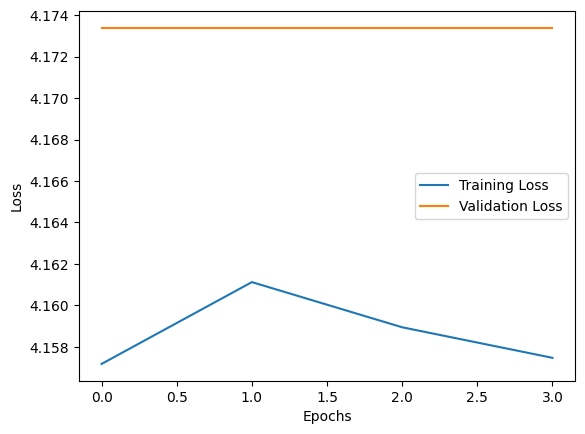

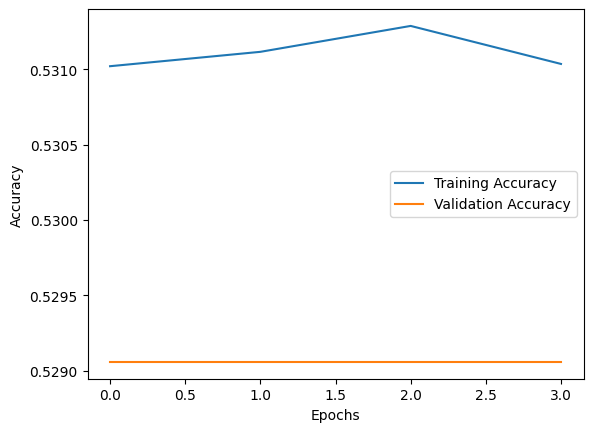

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
# Áp dụng các kỹ thuật tránh Overfitting trên các mô hình Recurrent Neural Network Cách 3

# Recurrent Neural Network (RNN)
# Khởi tạo mô hình
model_rnn = Sequential()

# Tạo EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Compile mô hình
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape dữ liệu để phù hợp với input shape của RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Huấn luyện mô hình với early stopping
history2 = model_rnn.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test), callbacks=[early_stopping])

# Lấy các thông số loss và accuracy từ thông tin quá trình huấn luyện
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_rnn.summary()

In [65]:
# Áp dụng các kỹ thuật tránh overfitting trên mô hình Gradient Boosting

#B1:
# Điều chỉnh siêu tham số n_estimators, số lượng cây trong Gradient Boosting: Giá trị quá lớn có thể gây overfitting
# Điều chỉnh độ cập nhật của các cây:  Giá trị learning rate nhỏ hơn có thể giúp tránh overfitting
# Sử dụng kỹ thuật regularization để kiểm soát độ phức tạp của mô hình : Sử dụng min_samples_split hoặc min_samples_leaf để đặt giới hạn tối thiểu cho số lượng mẫu yêu cầu để tiếp tục chia nhánh hoặc tạo lá.


model_fit_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2)

# Huấn luyện mô hình
model_fit_GB.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = model_fit_GB.predict(X_train)
y_test_pred = model_fit_GB.predict(X_test)

# Đánh giá hiệu suất của mô hình
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

Training accuracy: 1.0
Testing accuracy: 0.956140350877193


In [66]:
# B2:
# Cross-validation


scores = cross_val_score(model_fit_GB, X_train, y_train, cv=5)

# In kết quả cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.94505495 0.94505495 0.97802198 0.95604396 0.93406593]
Mean cross-validation score: 0.9516483516483516


In [69]:
#B3:
# Áp dụng early stopping
# Áp dụng kỹ thuật early stopping để dừng quá trình huấn luyện khi việc cải thiện hiệu suất trên tập kiểm tra không còn đáng kể.
# Điều này giúp tránh overfitting và tiết kiệm thời gian huấn luyện.


model_fit_GB3 = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=3, min_samples_leaf=20, early_stopping=True)

# Huấn luyện mô hình
model_fit_GB3.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = model_fit_GB3.predict(X_train)
y_test_pred = model_fit_GB3.predict(X_test)

# Đánh giá hiệu suất của mô hình
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.9956043956043956
Testing accuracy: 0.9649122807017544


In [71]:
# Áp dụng các kỹ thuật tránh overfitting trên mô hình AdaBoost

# B1:
# Giới hạn độ sâu của cây quyết định (base estimator)


# Khởi tạo mô hình AdaBoost với cây quyết định làm base estimator
estimator = DecisionTreeClassifier(max_depth=3)  # Giới hạn độ sâu của cây
model_Ada_fit = AdaBoostClassifier(estimator=estimator, n_estimators=100, learning_rate=0.1)

# Huấn luyện mô hình
model_Ada_fit.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = model_Ada_fit.predict(X_train)
y_test_pred = model_Ada_fit.predict(X_test)

# Đánh giá hiệu suất của mô hình
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

Training accuracy: 1.0
Testing accuracy: 0.9210526315789473


In [73]:
# B2:Sử dụng kỹ thuật regularization


# Khởi tạo mô hình AdaBoost với cây quyết định làm base estimator và regularization
estimator = DecisionTreeClassifier(ccp_alpha=0.1)  # Sử dụng ccp_alpha để áp dụng regularization
model_Ada_fit2 = AdaBoostClassifier(estimator=estimator, n_estimators=100, learning_rate=0.1)

# Huấn luyện mô hình
model_Ada_fit2.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = model_Ada_fit2.predict(X_train)
y_test_pred = model_Ada_fit2.predict(X_test)

# Đánh giá hiệu suất của mô hình
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.9714285714285714
Testing accuracy: 0.956140350877193


In [74]:
# B3:
# Điều chỉnh siêu tham số n_estimators, số lượng cây trong AdaBoost: Giá trị quá lớn có thể gây overfitting
# Điều chỉnh độ cập nhật của các cây:  Giá trị learning rate nhỏ hơn có thể giúp tránh overfitting

model_Ada_fit3 = AdaBoostClassifier(n_estimators=10, learning_rate=0.1)

# Huấn luyện mô hình
model_Ada_fit3.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = model_Ada_fit3.predict(X_train)
y_test_pred = model_Ada_fit3.predict(X_test)

# Đánh giá hiệu suất của mô hình
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.9538461538461539
Testing accuracy: 0.956140350877193


In [75]:
# Áp dụng các kỹ thuật tránh overfitting trên mô hình Bagging

# B1:
# Điều chỉnh số lượng cây trong ensemble (n_estimators):


# Khởi tạo mô hình Bagging với cây quyết định làm base estimator
estimator = DecisionTreeClassifier()

# Điều chỉnh số lượng cây trong ensemble (n_estimators)
n_estimators_values = [50, 100, 200, 300]  # Các giá trị số lượng cây khác nhau
for n_estimators in n_estimators_values:
    model_Bagg_fit1 = BaggingClassifier(estimator=estimator, n_estimators=n_estimators)

    # Sử dụng cross-validation để đánh giá hiệu suất
    scores = cross_val_score(model_Bagg_fit1, X, y, cv=5)  # Số lượng folds cross-validation là 5

    print("n_estimators:", n_estimators)
    print("Average accuracy:", scores.mean())
    print("")

n_estimators: 50
Average accuracy: 0.9596180717279925

n_estimators: 100
Average accuracy: 0.9596180717279925

n_estimators: 200
Average accuracy: 0.9596180717279925

n_estimators: 300
Average accuracy: 0.9613879832324173



In [76]:
# B2:
# Sử dụng cross-validation


# Khởi tạo mô hình Bagging với cây quyết định làm base estimator
estimator = DecisionTreeClassifier()

# Sử dụng cross-validation để đánh giá hiệu suất
model_Bagg_fit2 = BaggingClassifier(estimator=estimator)
scores = cross_val_score(model_Bagg_fit2, X, y, cv=5)  # Số lượng folds cross-validation là 5

print("Average accuracy:", scores.mean())

Average accuracy: 0.9561248253376805


# **Câu 5:**
Sau khi huấn luyện xong mô hình thì muốn cải thiện độ chính xác, ta sẽ làm gì để giải quyết nó? Phân tích các trường hợp sai, đề ra giải pháp và thực hiện nó, sau đó đánh giá xem có cải tiến so với trước không.

In [91]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [78]:
# Mô hình Random Forest
# Cách 1: Tăng số lượng cây trong mô hình
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Đánh giá độ chính xác
accuracy_rf = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình Random Forest:", accuracy_rf)

Độ chính xác của mô hình Random Forest: 0.9649122807017544


In [79]:
# Mô hình Random Forest
# Cách 2: Điều chỉnh độ sâu của cây
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Đánh giá độ chính xác
accuracy_rf = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình Random Forest:", accuracy_rf)

Độ chính xác của mô hình Random Forest: 0.9649122807017544


In [80]:
# Mô hình Random Forest
# Cách 3: Sử dụng tập features ngẫu nhiên
rf_model = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Đánh giá độ chính xác
accuracy_rf = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình Random Forest:", accuracy_rf)

Độ chính xác của mô hình Random Forest: 0.9649122807017544


In [81]:
# Mô hình Random Forest
# Cách 4: Sử dụng Grid Search để tìm siêu tham số tốt nhất

from sklearn.model_selection import GridSearchCV

# Định nghĩa các giá trị để thử nghiệm
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Tạo GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train, y_train)

# Lấy thông tin về kết quả tốt nhất
best_params = grid_result.best_params_
best_score = grid_result.best_score_

# Sử dụng siêu tham số tốt nhất để xây dựng mô hình
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình Random Forest sau tối ưu:", accuracy_rf)

Độ chính xác của mô hình Random Forest sau tối ưu: 0.9649122807017544


In [83]:
# Tách features và labels
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Label encoding cho target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/10
15/15 [==============================] - 2s 26ms/step - loss: 8.6843 - accuracy: 0.5802 - val_loss: 1.9880 - val_accuracy: 0.6842
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 3.0159 - accuracy: 0.6659 - val_loss: 1.4859 - val_accuracy: 0.6842
Epoch 3/10
15/15 [==============================] - 0s 8ms/step - loss: 1.5363 - accuracy: 0.7626 - val_loss: 0.5676 - val_accuracy: 0.8246
Epoch 4/10
15/15 [==============================] - 0s 9ms/step - loss: 0.9458 - accuracy: 0.7780 - val_loss: 0.3791 - val_accuracy: 0.9386
Epoch 5/10
15/15 [==============================] - 0s 8ms/step - loss: 0.7114 - accuracy: 0.8132 - val_loss: 0.2985 - val_accuracy: 0.9386
Epoch 6/10
15/15 [==============================] - 0s 10ms/step - loss: 0.5303 - accuracy: 0.8659 - val_loss: 0.6715 - val_accuracy: 0.6930
Epoch 7/10
15/15 [==============================] - 0s 8ms/step - loss: 0.4452 - accuracy: 0.8725 - val_loss: 0.1434 - val_accuracy: 0.9474
Epoch 8/10
15/15 [

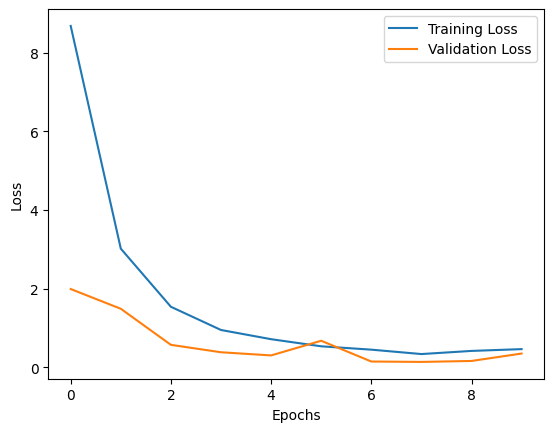

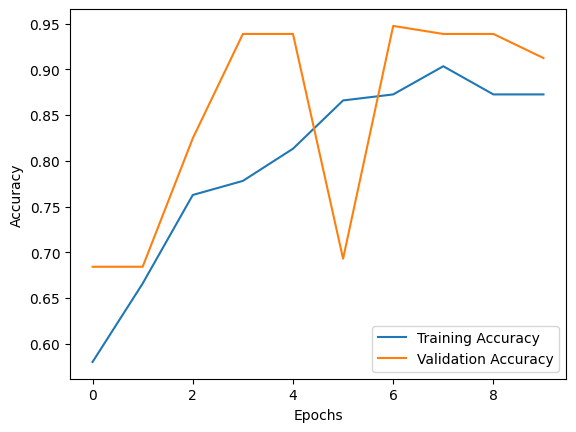

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                1984      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
# Feed Forward Neural Network
# Cách 1: Tăng số lượng hidden layers và units:
# Khởi tạo mô hình
model_ffnn = Sequential()

# Thêm các layer
model_ffnn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_ffnn.add(Dense(32, activation='relu'))
model_ffnn.add(Dense(1, activation='sigmoid'))

# Compile mô hình
model_ffnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
history1 = model_ffnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Lấy các thông số loss và accuracy từ thông tin quá trình huấn luyện
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']
train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_ffnn.summary()

Epoch 1/10
15/15 [==============================] - 2s 26ms/step - loss: 4.0160 - accuracy: 0.0264 - val_loss: 7.0453 - val_accuracy: 0.0000e+00
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 3.9967 - accuracy: 0.0396 - val_loss: 6.2835 - val_accuracy: 0.0000e+00
Epoch 3/10
15/15 [==============================] - 0s 9ms/step - loss: 3.8052 - accuracy: 0.0220 - val_loss: 5.0731 - val_accuracy: 0.0000e+00
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 3.6996 - accuracy: 0.0176 - val_loss: 4.3035 - val_accuracy: 0.0000e+00
Epoch 5/10
15/15 [==============================] - 0s 8ms/step - loss: 3.6348 - accuracy: 0.0242 - val_loss: 3.8749 - val_accuracy: 0.0000e+00
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 3.6215 - accuracy: 0.0220 - val_loss: 3.6353 - val_accuracy: 0.0000e+00
Epoch 7/10
15/15 [==============================] - 0s 8ms/step - loss: 3.5160 - accuracy: 0.0154 - val_loss: 3.4896 - val_accuracy: 0.

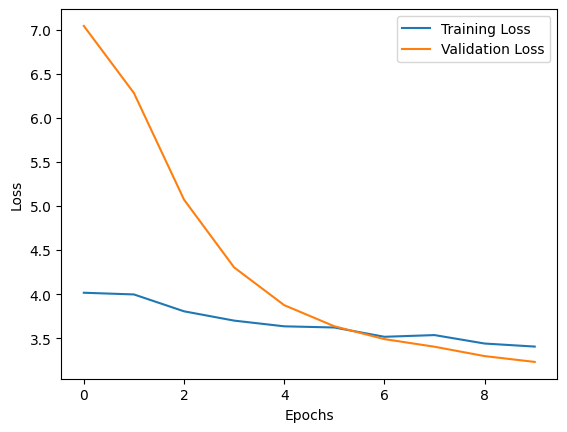

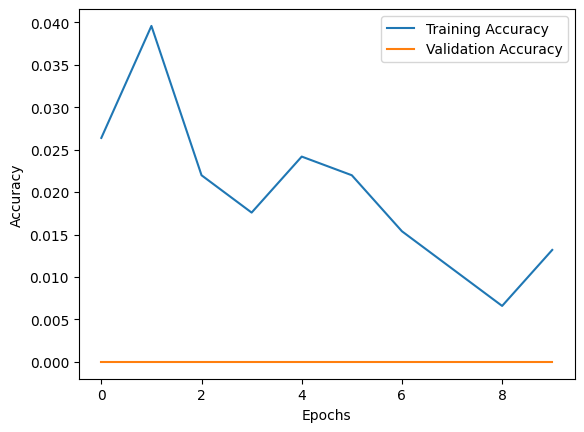

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                992       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
Total params: 1120 (4.38 KB)
Trainable params: 1056 (4.12 KB)
Non-trainable params: 64 (256.00 Byte)
_________________________________________________________________


In [85]:
# Feed Forward Neural Network
# Cách 2: Sử dụng Batch Normalization:
# Khởi tạo mô hình

from keras.layers import BatchNormalization

model_ffnn = Sequential()

# Thêm các layer

model_ffnn.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model_ffnn.add(BatchNormalization())

# Compile mô hình
model_ffnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
history1 = model_ffnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Lấy các thông số loss và accuracy từ thông tin quá trình huấn luyện
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']
train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_ffnn.summary()

Epoch 1/10
15/15 [==============================] - 4s 109ms/step - loss: 2.5506 - accuracy: 0.7714 - val_loss: 1.3983 - val_accuracy: 0.7368
Epoch 2/10
15/15 [==============================] - 1s 44ms/step - loss: 1.0064 - accuracy: 0.8000 - val_loss: 0.6826 - val_accuracy: 0.8246
Epoch 3/10
15/15 [==============================] - 1s 40ms/step - loss: 1.7679 - accuracy: 0.7297 - val_loss: 1.3670 - val_accuracy: 0.7544
Epoch 4/10
15/15 [==============================] - 1s 41ms/step - loss: 1.2893 - accuracy: 0.7692 - val_loss: 0.3935 - val_accuracy: 0.8772
Epoch 5/10
15/15 [==============================] - 1s 35ms/step - loss: 0.7554 - accuracy: 0.8462 - val_loss: 0.3111 - val_accuracy: 0.9035
Epoch 6/10
15/15 [==============================] - 1s 38ms/step - loss: 0.7415 - accuracy: 0.7868 - val_loss: 0.4167 - val_accuracy: 0.7895
Epoch 7/10
15/15 [==============================] - 1s 34ms/step - loss: 0.6439 - accuracy: 0.8440 - val_loss: 0.7137 - val_accuracy: 0.8421
Epoch 8/10
1

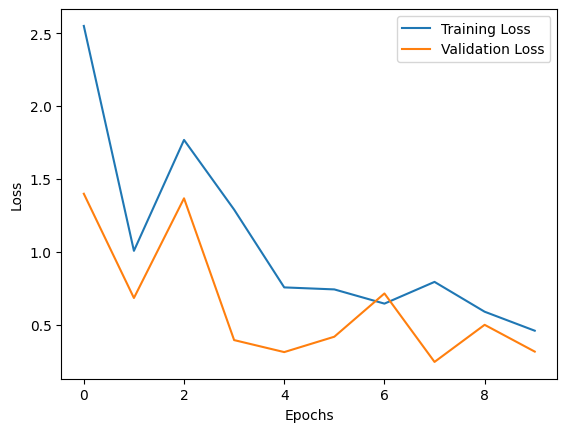

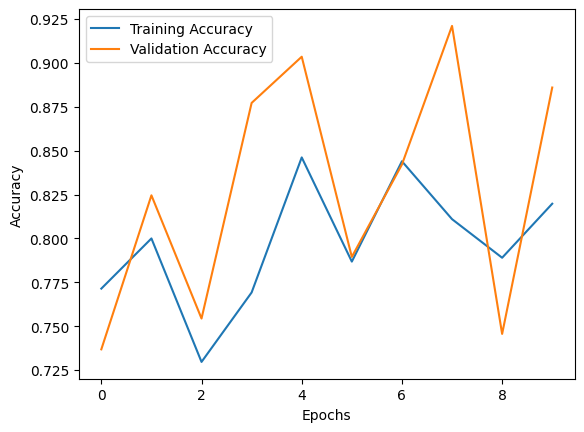

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
# Recurrent Neural Network (RNN)
# Cách 1: Sử dụng LSTM hoặc GRU thay vì SimpleRNN:
# Khởi tạo mô hình
from keras.layers import LSTM

model_rnn = Sequential()

# Thêm các layer
model_rnn.add(LSTM(32, input_shape=(X_train.shape[1], 1), activation='relu'))

model_rnn.add(Dense(1, activation='sigmoid'))

# Compile mô hình
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape dữ liệu để phù hợp với input shape của RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Huấn luyện mô hình
history2 = model_rnn.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Lấy các thông số loss và accuracy từ thông tin quá trình huấn luyện
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_rnn.summary()

Epoch 1/10
15/15 [==============================] - 4s 53ms/step - loss: 7.2246 - accuracy: 0.6418 - val_loss: 3.1052 - val_accuracy: 0.7895
Epoch 2/10
15/15 [==============================] - 0s 32ms/step - loss: 3.7950 - accuracy: 0.7956 - val_loss: 1.4453 - val_accuracy: 0.9035
Epoch 3/10
15/15 [==============================] - 1s 39ms/step - loss: 1.4607 - accuracy: 0.8571 - val_loss: 1.7697 - val_accuracy: 0.8509
Epoch 4/10
15/15 [==============================] - 1s 37ms/step - loss: 1.3170 - accuracy: 0.8505 - val_loss: 0.7810 - val_accuracy: 0.8947
Epoch 5/10
15/15 [==============================] - 1s 40ms/step - loss: 2.3556 - accuracy: 0.8769 - val_loss: 1.6339 - val_accuracy: 0.8947
Epoch 6/10
15/15 [==============================] - 1s 37ms/step - loss: 1.4338 - accuracy: 0.8835 - val_loss: 0.5941 - val_accuracy: 0.9211
Epoch 7/10
15/15 [==============================] - 1s 51ms/step - loss: 1.2439 - accuracy: 0.8747 - val_loss: 0.6557 - val_accuracy: 0.9211
Epoch 8/10
15

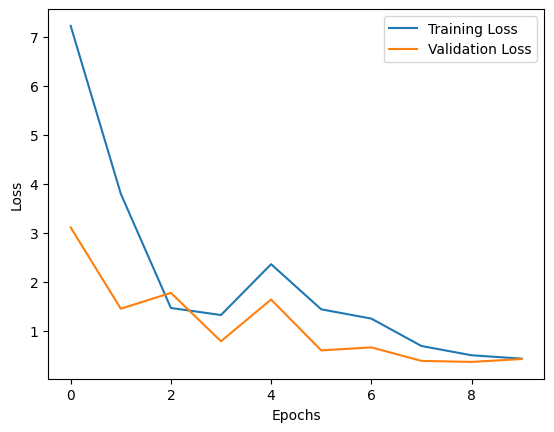

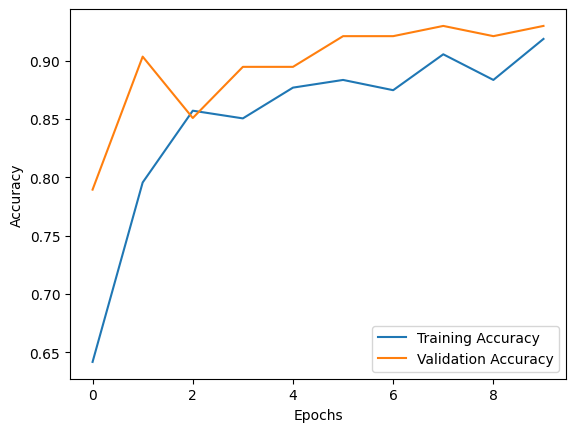

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 64)                8704      
 al)                                                             
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8769 (34.25 KB)
Trainable params: 8769 (34.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
# Recurrent Neural Network (RNN)
# Cách 2: Sử dụng Bidirectional RNN:
# Khởi tạo mô hình
from keras.layers import Bidirectional, LSTM

model_rnn = Sequential()

# Thêm các layer
model_rnn.add(Bidirectional(LSTM(32, activation='relu'), input_shape=(X_train.shape[1], 1)))

model_rnn.add(Dense(1, activation='sigmoid'))

# Compile mô hình
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape dữ liệu để phù hợp với input shape của RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Huấn luyện mô hình
history2 = model_rnn.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Lấy các thông số loss và accuracy từ thông tin quá trình huấn luyện
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_rnn.summary()

In [88]:
# Mô hình Gradient Boosting
# Tối ưu hóa siêu tham số sử dụng GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_model = GradientBoostingClassifier()
grid_search = GridSearchCV(gb_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Lấy mô hình đã tối ưu hóa
best_gb_model = grid_search.best_estimator_

# Dự đoán trên tập kiểm tra
y_pred = best_gb_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [89]:
# Mô hình AdaBoost

# Tối ưu hóa siêu tham số sử dụng GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

adaboost_model = AdaBoostClassifier()
grid_search = GridSearchCV(adaboost_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Lấy mô hình đã tối ưu hóa
best_adaboost_model = grid_search.best_estimator_

# Dự đoán trên tập kiểm tra
y_pred = best_adaboost_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

# Ta thấy kết quả nhỏ hơn nếu sử dụng tham số mặc định
# Đối với dữ liệu breast-cancer-wisconsin này thì sau khi thử các cách để cải thiện độ
# chính xác cho các mô hình thuộc Ensemble Learing thì em rút ra nhận xét là sử dụng các tham
# số mặc định như n_estimators và learning_rate là trường hợp tối ứu hóa nhất cho bộ dữ liệu này.

Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [93]:
model = RandomForestClassifier(n_estimators=200, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
misclassified_samples = X_test[y_pred != y_test]

cross_val_scores = cross_val_score(best_rf_model, X, y, cv=5)
mean_cv_score = cross_val_scores.mean()

base_models = [
    ('rf', best_rf_model),
    # Add other base models if needed
]

stacked_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())